In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("./NVDA.csv")

In [53]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
1,2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2,2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
3,2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
4,2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400
...,...,...,...,...,...,...,...
6111,2024-04-18,849.700012,861.900024,824.020020,846.710022,846.710022,44726000
6112,2024-04-19,831.500000,843.239990,756.059998,762.000000,762.000000,87190500
6113,2024-04-22,781.039978,800.729980,764.000000,795.179993,795.179993,59634100
6114,2024-04-23,807.690002,827.690002,802.640015,824.229980,824.229980,43855900


In [54]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6116.000000,6116.000000,6116.000000,6116.000000,6116.000000,6.116000e+03
mean,53.052266,54.017201,52.031700,53.064741,52.794253,6.221933e+07
std,121.267334,123.423982,118.835114,121.183234,121.214864,4.316714e+07
min,0.608333,0.656667,0.600000,0.614167,0.563377,4.564400e+06
25%,2.959688,3.027500,2.875000,2.950391,2.707880,3.615840e+07
50%,4.683750,4.747500,4.608750,4.682500,4.389289,5.206235e+07
75%,42.101873,42.645625,41.500000,42.102499,41.741090,7.465490e+07
max,958.510010,974.000000,935.099976,950.020020,950.020020,9.230856e+08


In [55]:
# We see that the data has high standard deviation and variance, indicating high volatility in the stock prices.
# But we also see that the mean is significantly higher than the median, indicating a right skewed distribution.
# This means that there are some extreme values (outliers) that are pulling the mean up.
# Here it is important to note that the stock prices are not normally distributed, and we should be careful when interpreting the mean and standard deviation.
# So by checking the trend of the stock prices over time, we can see that the stock prices have been increasing over the years, with some fluctuations.
# This indicates that the stock is generally performing well, but there are some periods of high volatility.
# And thus the outliers are not affecting the overall trend of the stock prices and hence no need to remove them.

# Let's now check for missing values in the dataset.
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [56]:
# So there are zero null values in the dataset.
# Lets see if there are any non numeric values in the dataset.
df.select_dtypes(include=['object']).nunique()

Date    6116
dtype: int64

In [57]:
# Alright, so there are no non-numeric values in the dataset.
# Now we will check for any duplicate rows in the dataset.
df.duplicated().sum()

0

In [58]:
# So zero duplicate rows in the dataset.
# Now we can see that the datatype of the 'Date' column is object, we will convert it to datetime format.
df['Date'] = pd.to_datetime(df['Date'])
# Now we will set the 'Date' column as the index of the dataframe.
df.set_index('Date', inplace=True)
# Now we will check the datatype of the 'Date' column again.
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [59]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.984375,0.992188,0.919271,0.975260,0.894608,30091200
2000-01-04,0.958333,0.960938,0.901042,0.949219,0.870721,30048000
2000-01-05,0.921875,0.937500,0.904948,0.917969,0.842055,18835200
2000-01-06,0.917969,0.917969,0.822917,0.858073,0.787112,12048000
2000-01-07,0.854167,0.881510,0.841146,0.872396,0.800251,7118400


In [60]:
# So going through the dataset, we can see that the data is already clean and ready for analysis. So we can proceed with visualization and analysis.

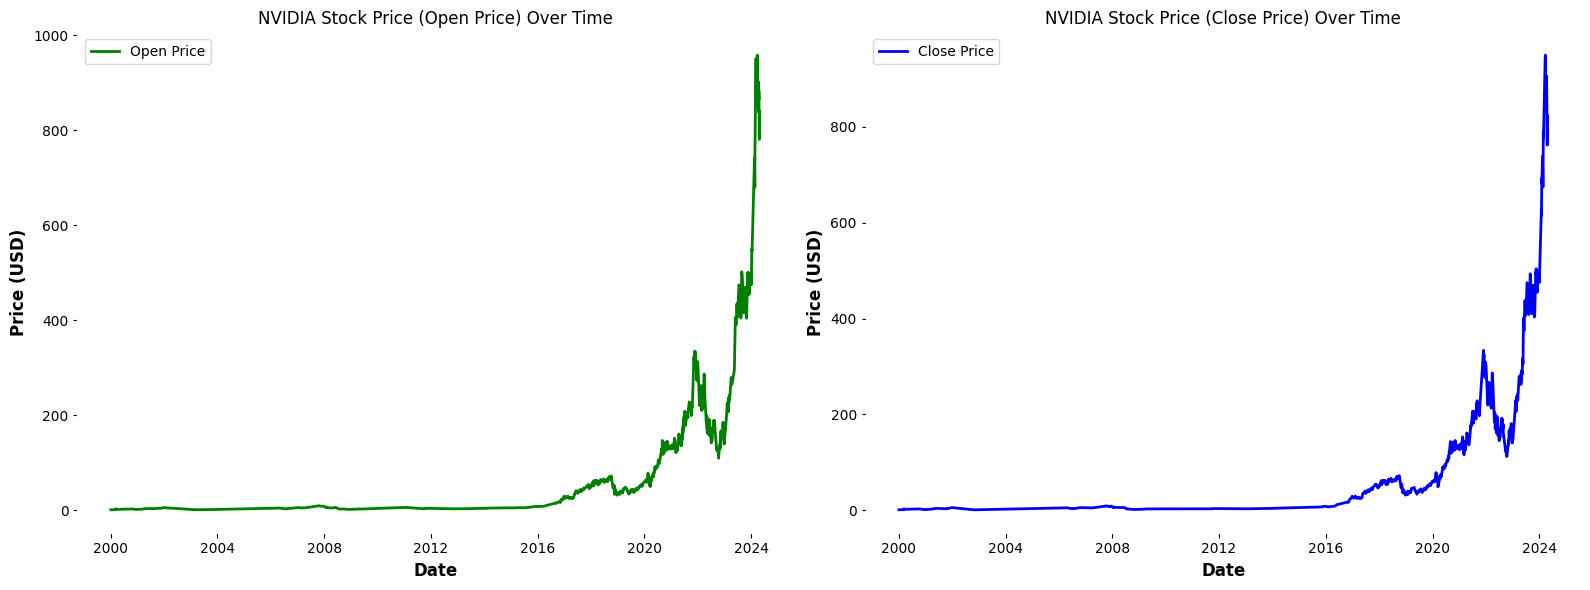

In [61]:
# Now we will visualize the stock prices of NVIDIA over time.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Open Price
axes[0].plot(df.index, df['Open'], color='green')
axes[0].set_title('NVIDIA Stock Price (Open Price) Over Time')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].grid()
axes[0].legend(['Open Price'])

# Close Price
axes[1].plot(df.index, df['Close'], color='blue')
axes[1].set_title('NVIDIA Stock Price (Close Price) Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].grid()
axes[1].legend(['Close Price'])

plt.tight_layout()
plt.show()

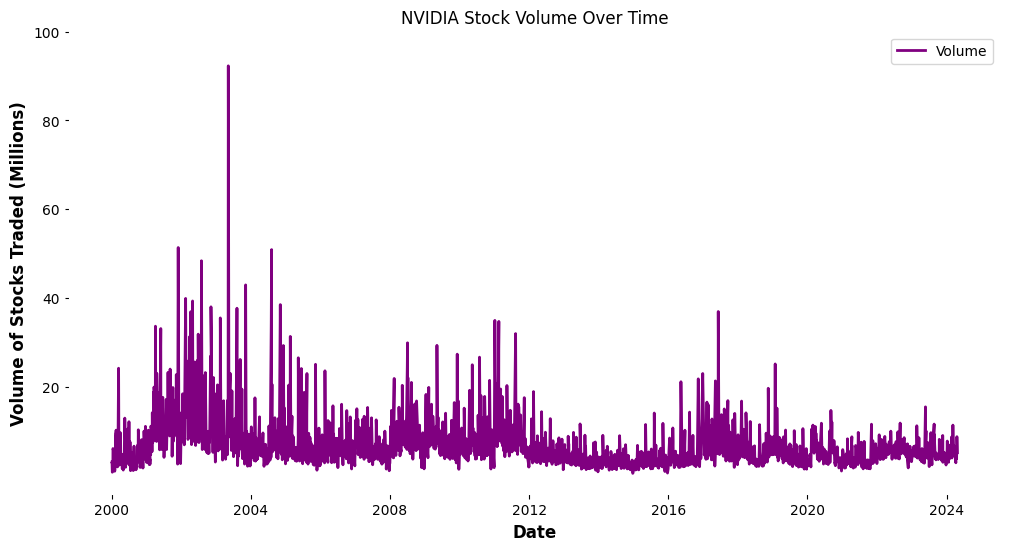

In [62]:
# Now we will visualize the stock volume of NVIDIA over time.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volume'], color='purple')
plt.title('NVIDIA Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume of Stocks Traded (Millions)')
plt.yticks([200000000, 400000000, 600000000, 800000000, 1000000000], ['20', '40', '60', '80', '100'])
plt.grid()
plt.legend(['Volume'])
plt.show()

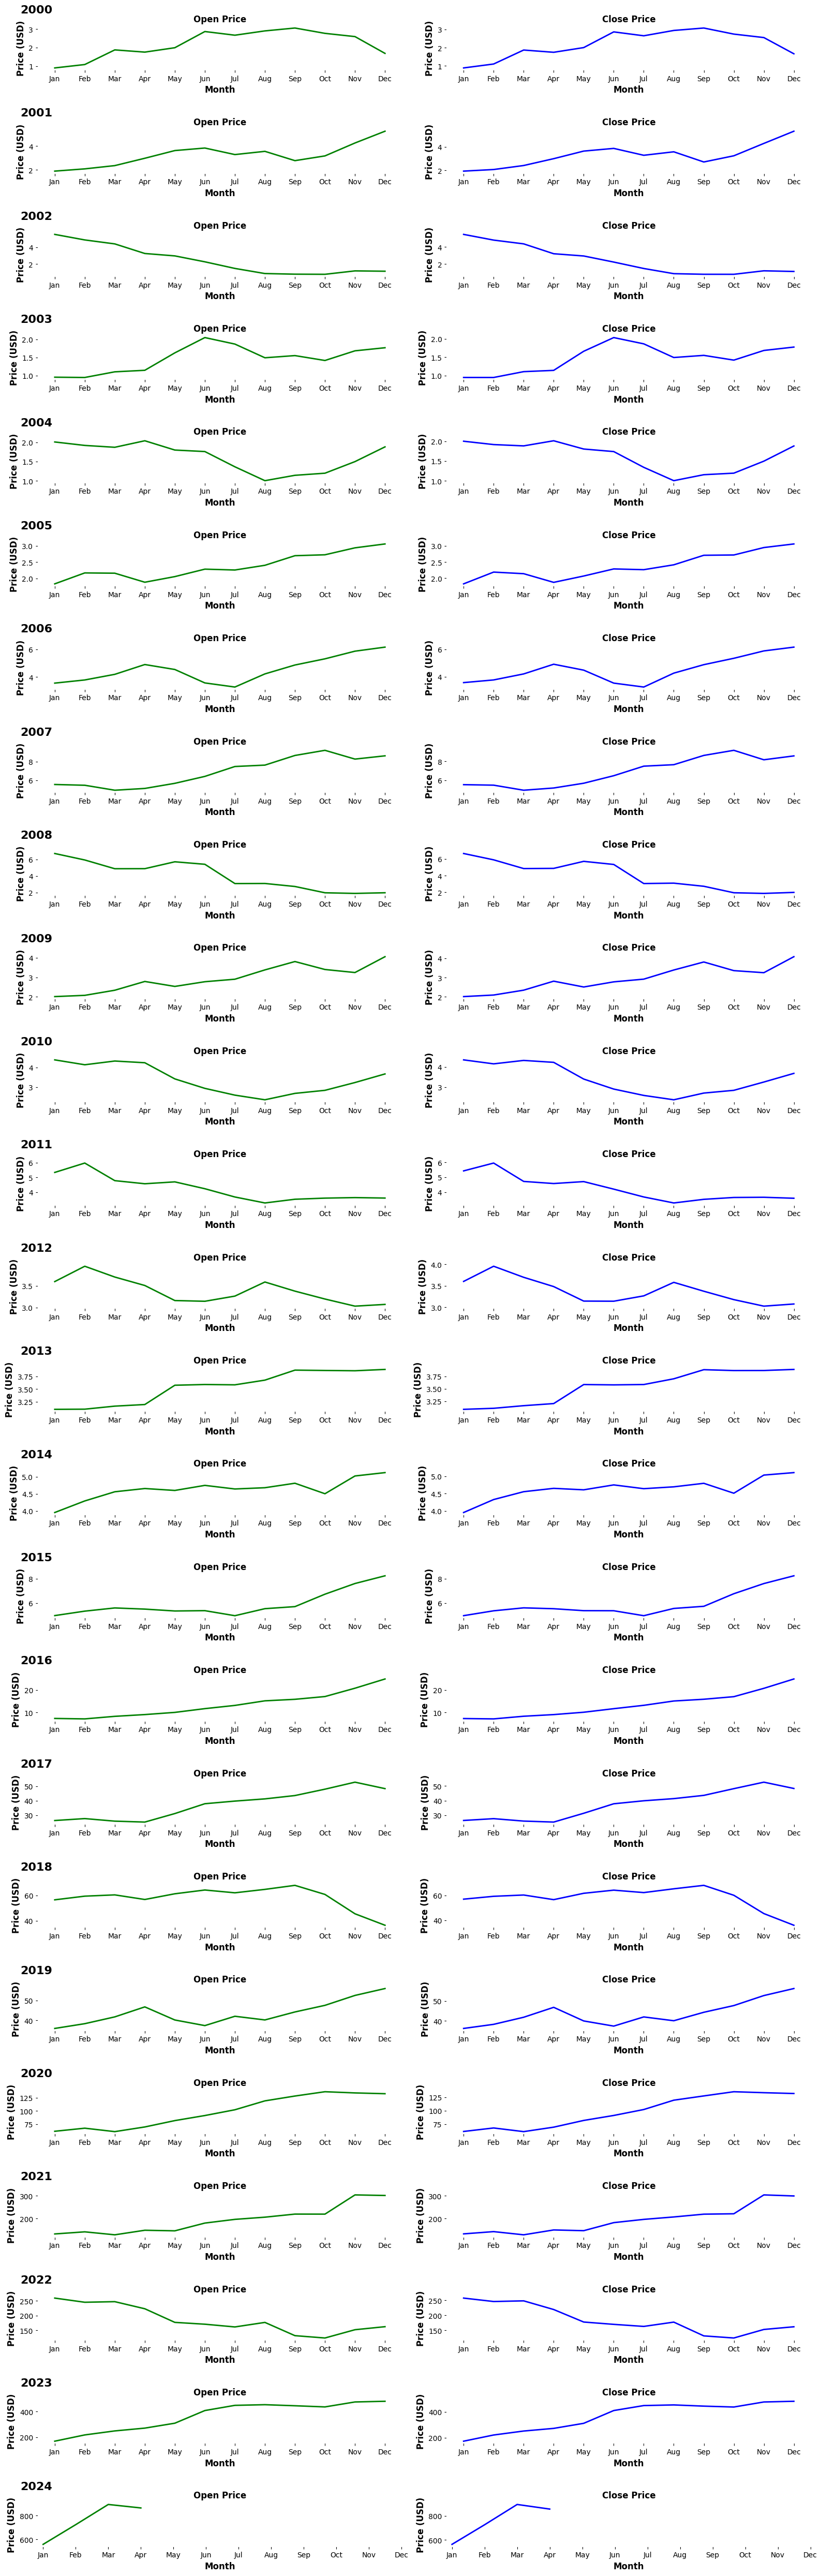

In [63]:
# Now let's visualize the yearly stock prices of NVIDIA with each month's average prices (open/close) plotted on the line chart.
df['Year'] = df.index.year
df['Month'] = df.index.month
fig, axes = plt.subplots(25, 2, figsize=(16, 50))
years = sorted(df['Year'].unique())
for i, year in enumerate(years):
    monthly_data = df[df['Year'] == year].groupby('Month').mean()
    # Add year as a bold label above both subplots in the row
    axes[i, 0].text(-0.05, 1.25, f"{year}", transform=axes[i, 0].transAxes,
                    fontsize=16, fontweight='bold', ha='left', va='bottom')
    # Open Price
    axes[i, 0].plot(monthly_data.index, monthly_data['Open'], color='green', )
    axes[i, 0].set_title('Open Price', fontweight='bold')
    axes[i, 0].set_xlabel('Month')
    axes[i, 0].set_xticks(np.arange(1, 13, 1))
    axes[i, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i, 0].set_ylabel('Price (USD)')
    axes[i, 0].grid()
    # Close Price
    axes[i, 1].plot(monthly_data.index, monthly_data['Close'], color='blue')
    axes[i, 1].set_title('Close Price', fontweight='bold')
    axes[i, 1].set_xlabel('Month')
    axes[i, 1].set_xticks(np.arange(1, 13, 1))
    axes[i, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i, 1].set_ylabel('Price (USD)')
    axes[i, 1].grid()
plt.tight_layout()
plt.show()

In [64]:
# This visualization shows the average monthly stock prices of NVIDIA for each year, allowing us to observe trends and patterns over time.
# Each row represents a different year, with the left subplot showing the average open price and the right subplot showing the average close price for each month of that year.
# We can observe how the stock prices have changed over the years, with some years showing significant increases in both open and close prices, while others may show more stability or even declines.

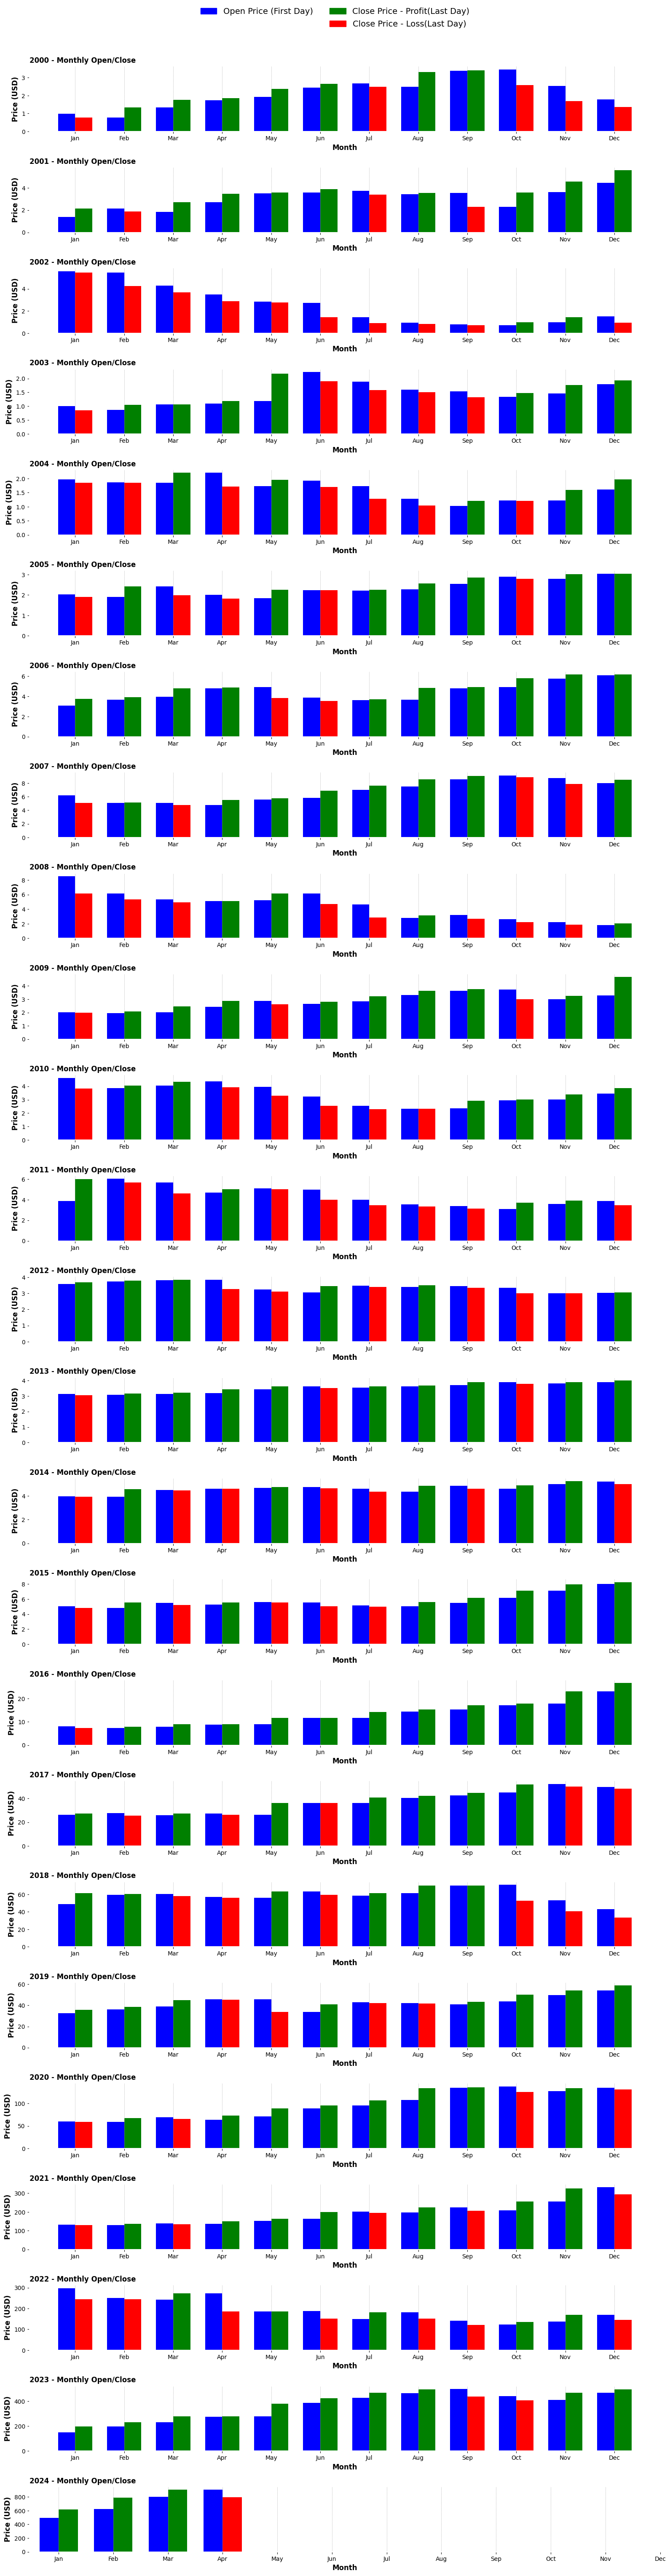

In [65]:
# Now lets visualize the monthly open and close prices for each year in a stacked bar chart format. This will allow us to see the open and close prices (of the first and last day respectively) for each month of each year in a single plot, making it easier to compare the performance of the stock over time.

import matplotlib.patches as mpatches

fig, axes = plt.subplots(25, 1, figsize=(16, 60))  # 1 plot per year, stacked vertically
years = sorted(df['Year'].unique())
months = np.arange(1, 13)

for i, year in enumerate(years):
    year_data = df[df['Year'] == year]
    open_prices = []
    close_prices = []
    for month in months:
        month_data = year_data[year_data['Month'] == month]
        if not month_data.empty:
            open_prices.append(month_data.iloc[0]['Open'])  # First open of the month
            close_prices.append(month_data.iloc[-1]['Close'])  # Last close of the month
        else:
            open_prices.append(np.nan)
            close_prices.append(np.nan)

    bar_width = 0.35
    axes[i].bar(months - bar_width/2, open_prices, width=bar_width, label='Open', color='blue')

    # Set color green if close > open, else red
    bar_colors = ['green' if (not np.isnan(c) and not np.isnan(o) and c > o) else 'red' for c, o in zip(close_prices, open_prices)]
    axes[i].bar(months + bar_width/2, close_prices, width=bar_width, label='Close', color=bar_colors)

    axes[i].set_title(f"{year} - Monthly Open/Close", loc='left', fontweight='bold')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Price (USD)')
    axes[i].set_xticks(months)
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].grid(axis='y')

# Custom legend at the top
legend_handles = [
    mpatches.Patch(color='blue', label='Open Price (First Day)'),
    mpatches.Patch(color='green', label='Close Price - Profit(Last Day)'),
]
fig.legend(handles=legend_handles, loc='upper center', ncol=2, fontsize=14, frameon=False, bbox_to_anchor=(0.5, 1.02))
legend_handles_2 = [mpatches.Patch(color='red', label='Close Price - Loss(Last Day)')]
fig.legend(handles=legend_handles_2, loc='upper center', ncol=1, fontsize=14, frameon=False, bbox_to_anchor=(0.5933, 1.015))
plt.tight_layout()
plt.show()

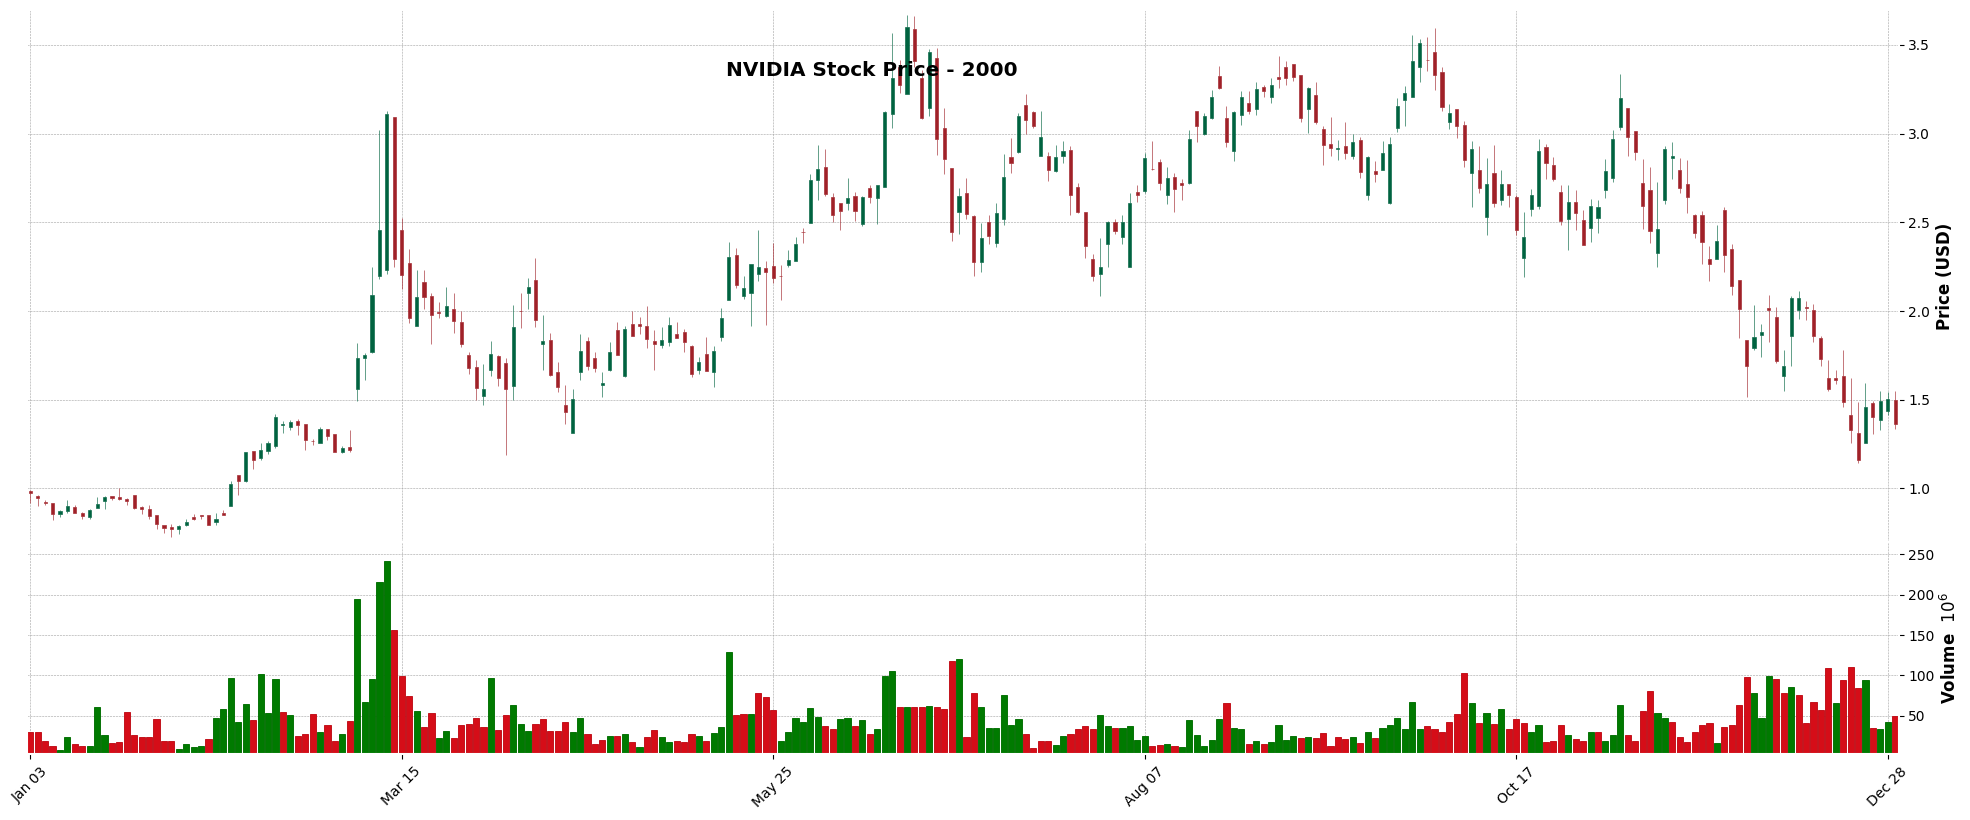

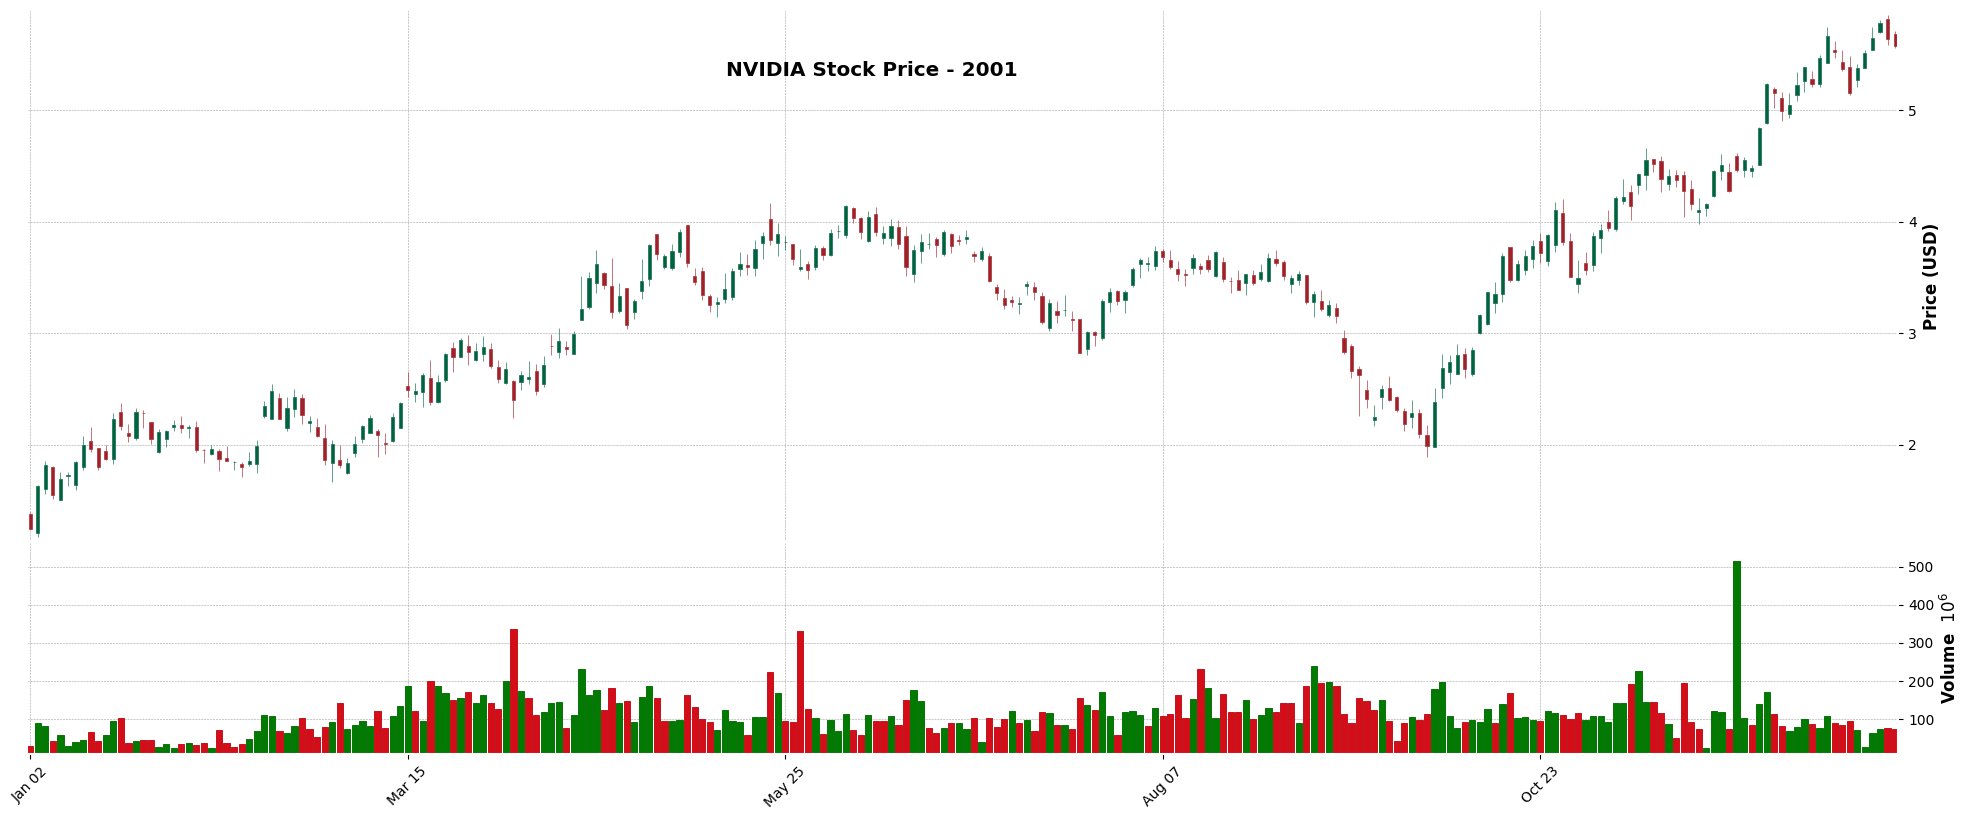

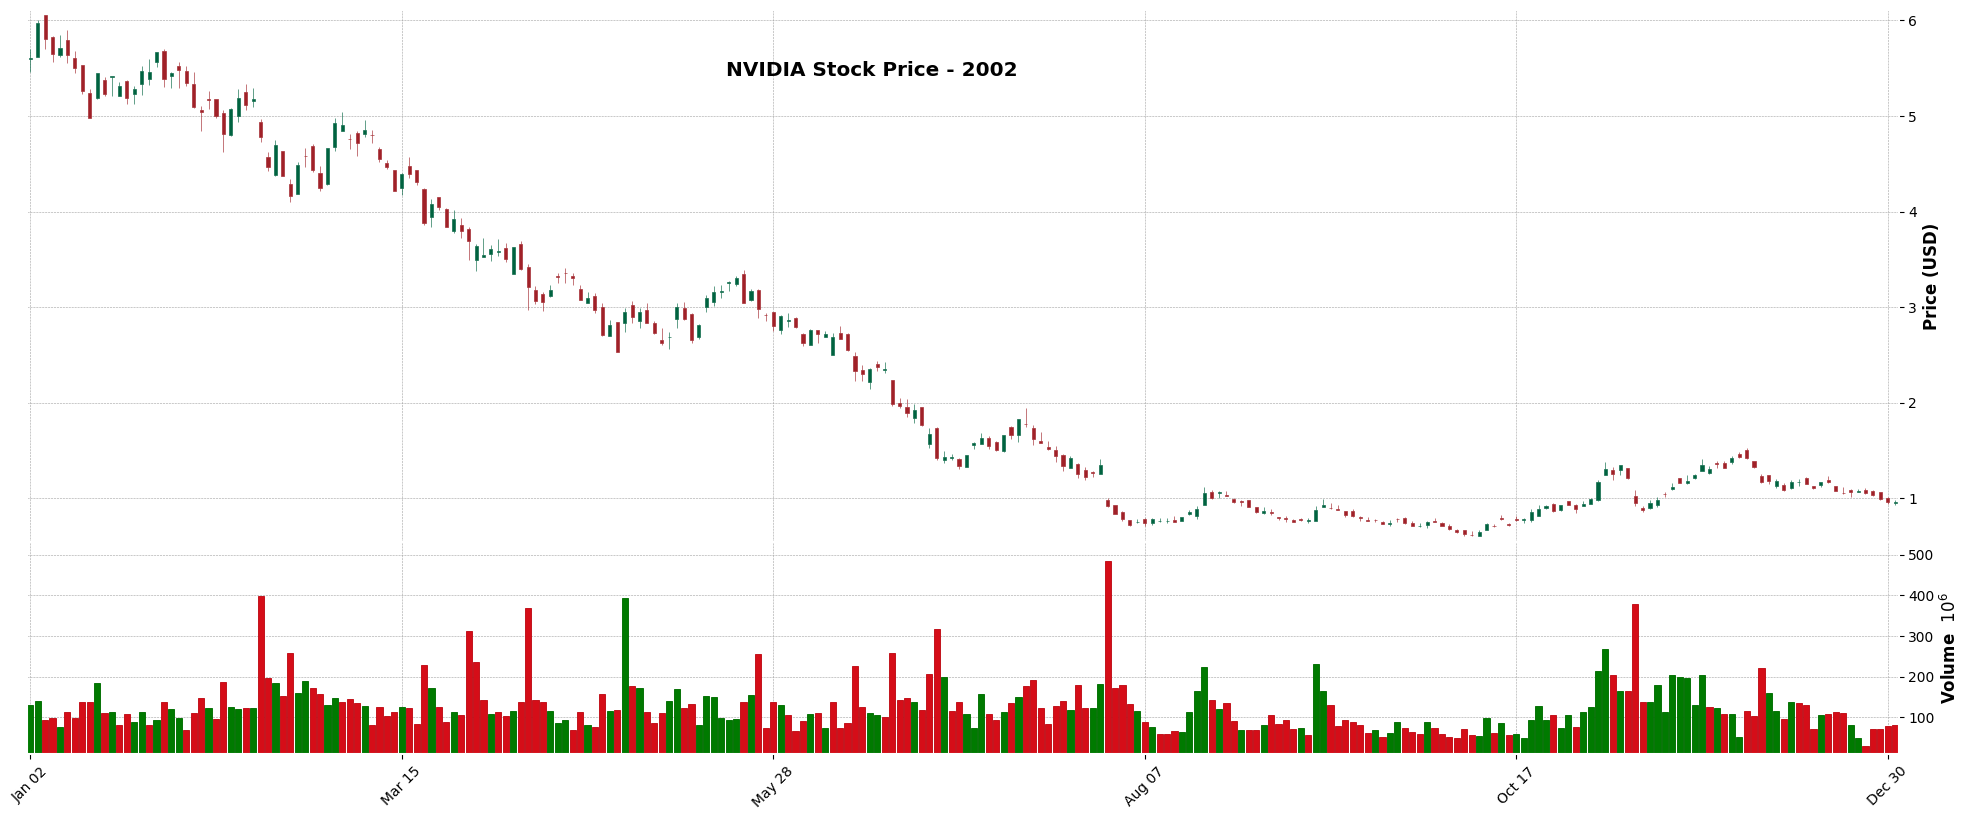

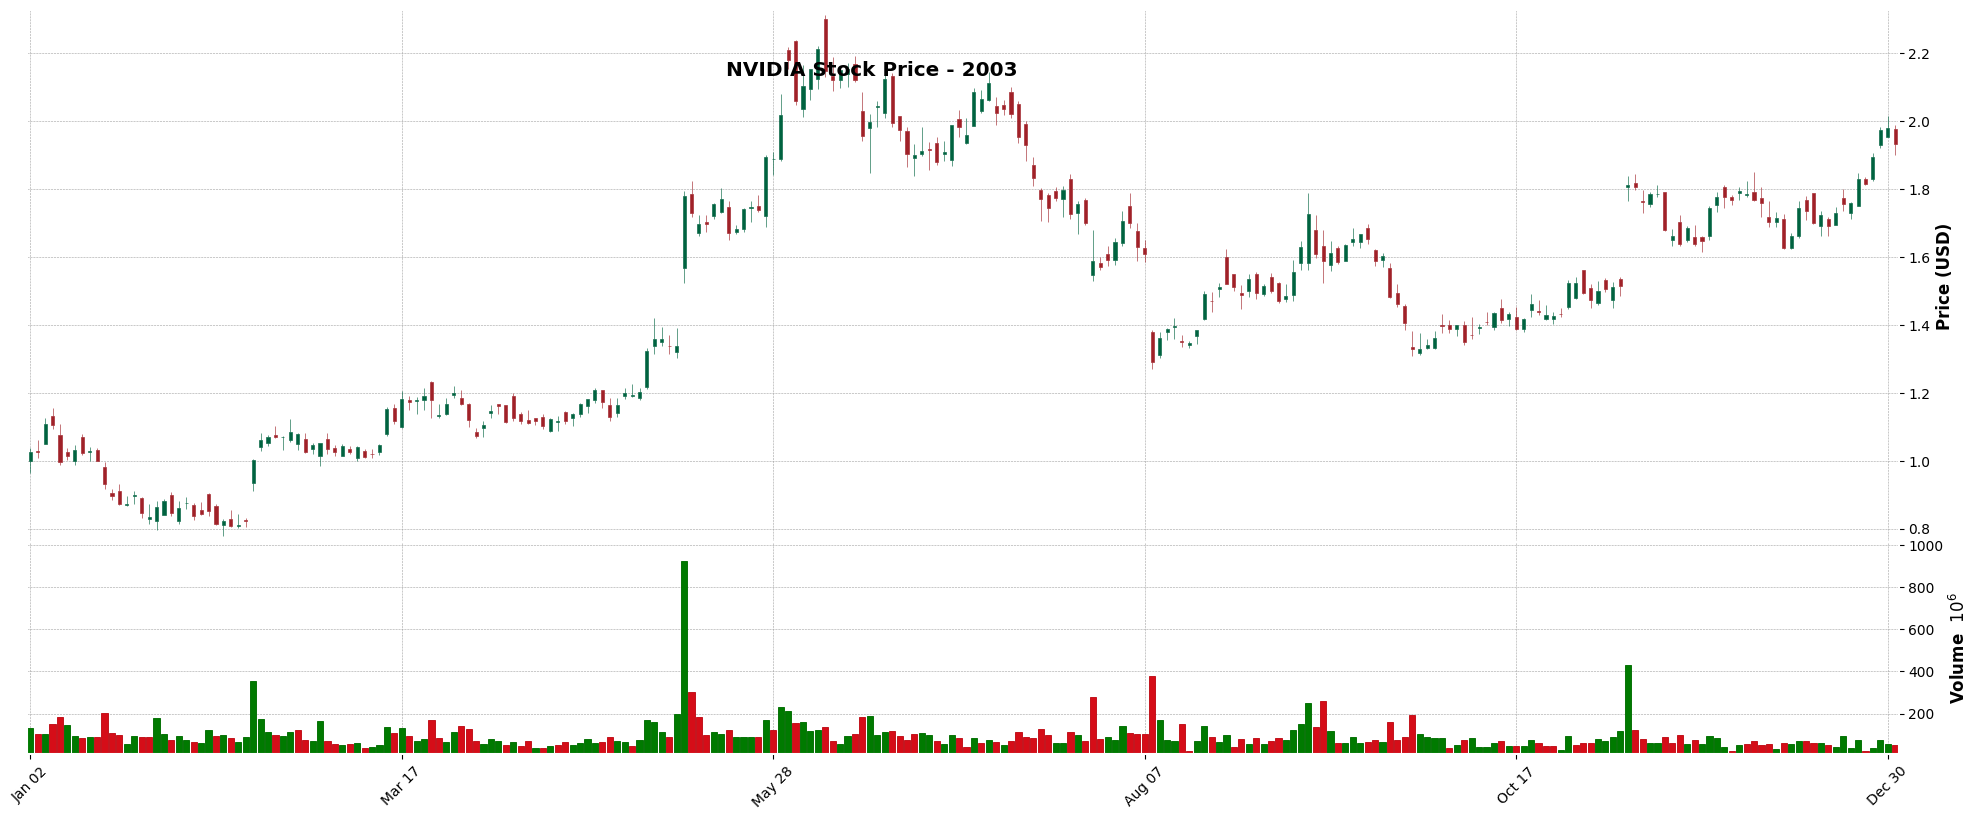

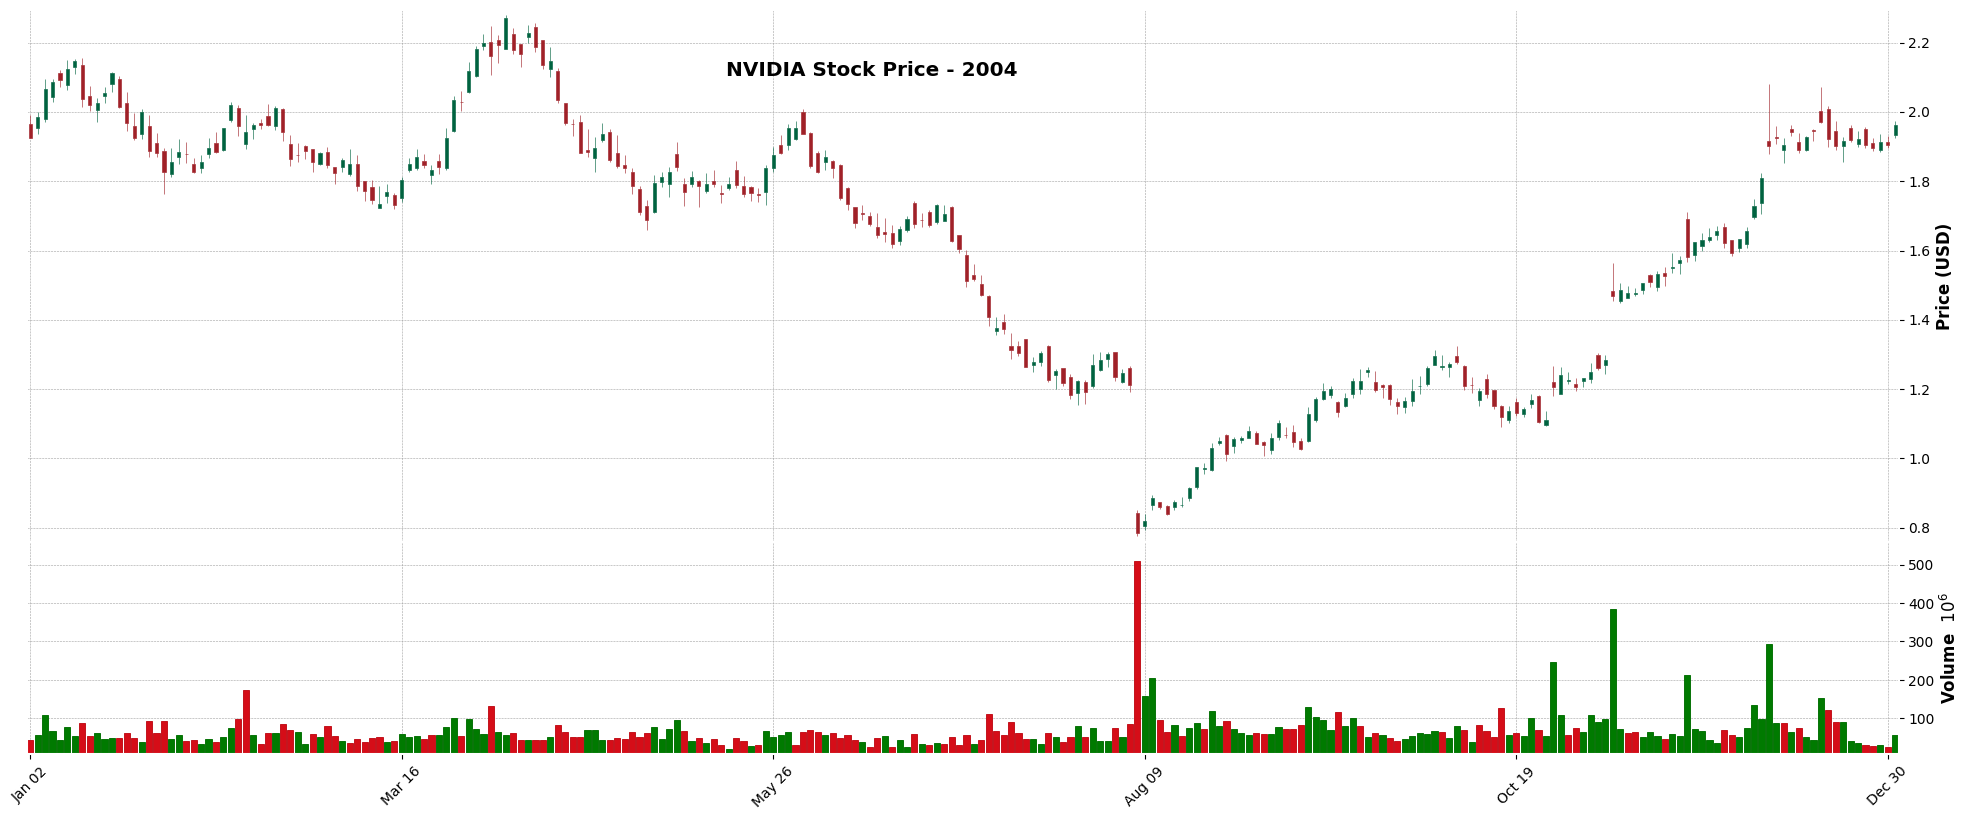

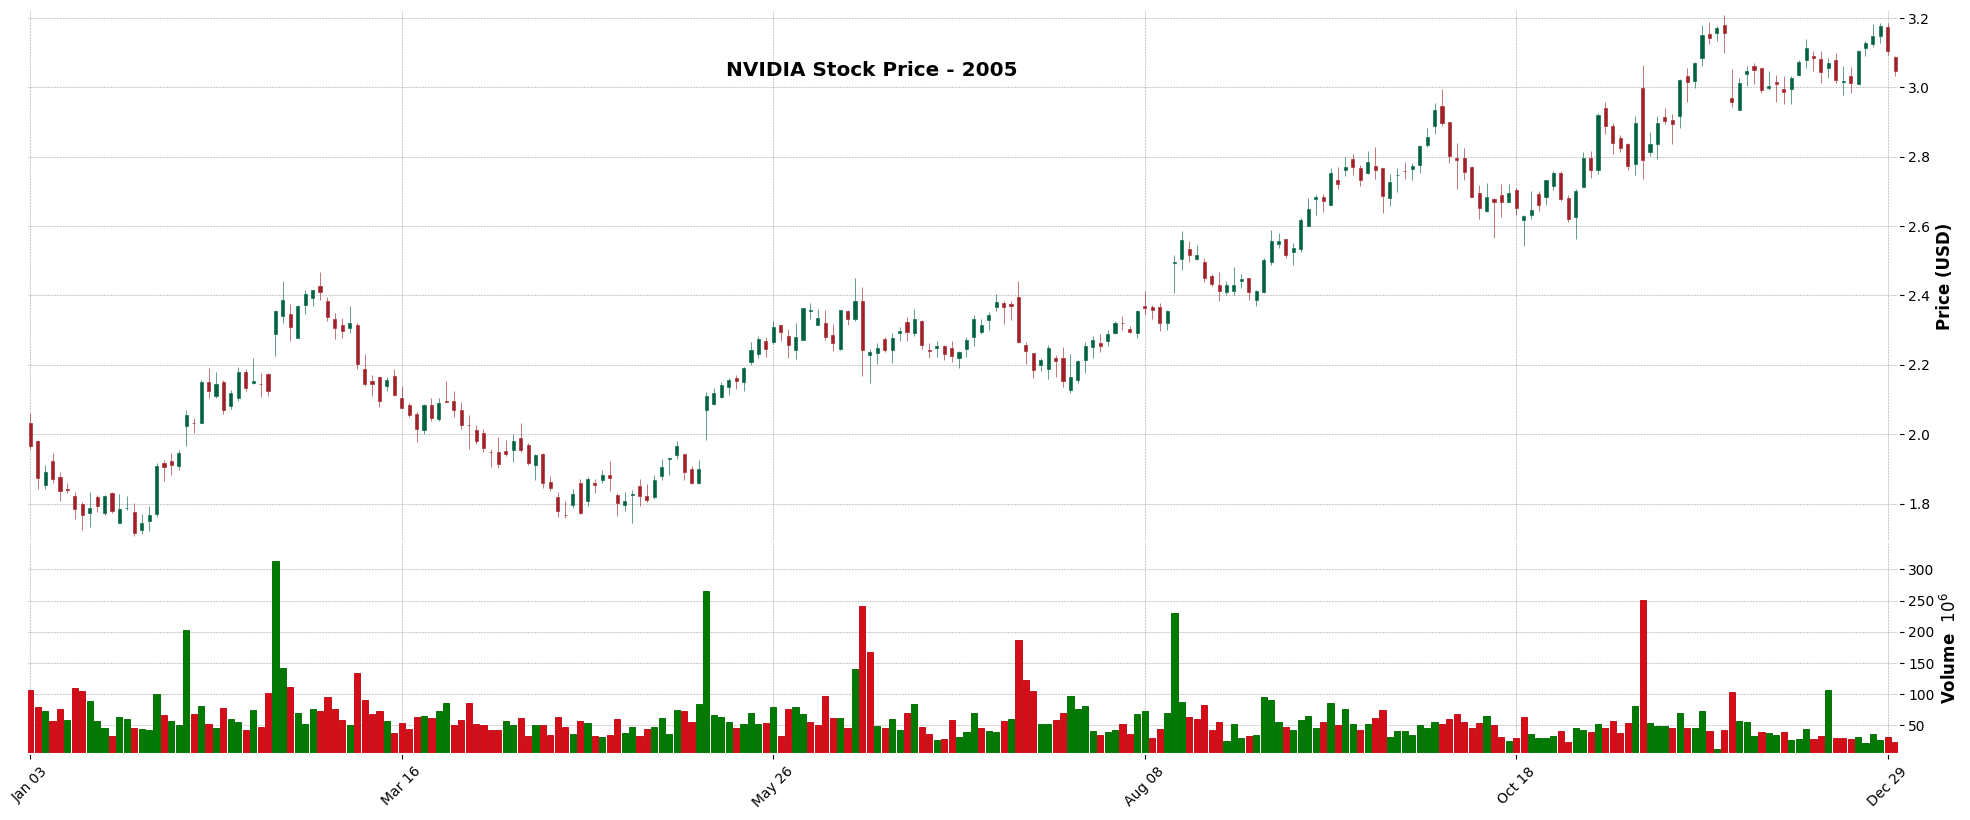

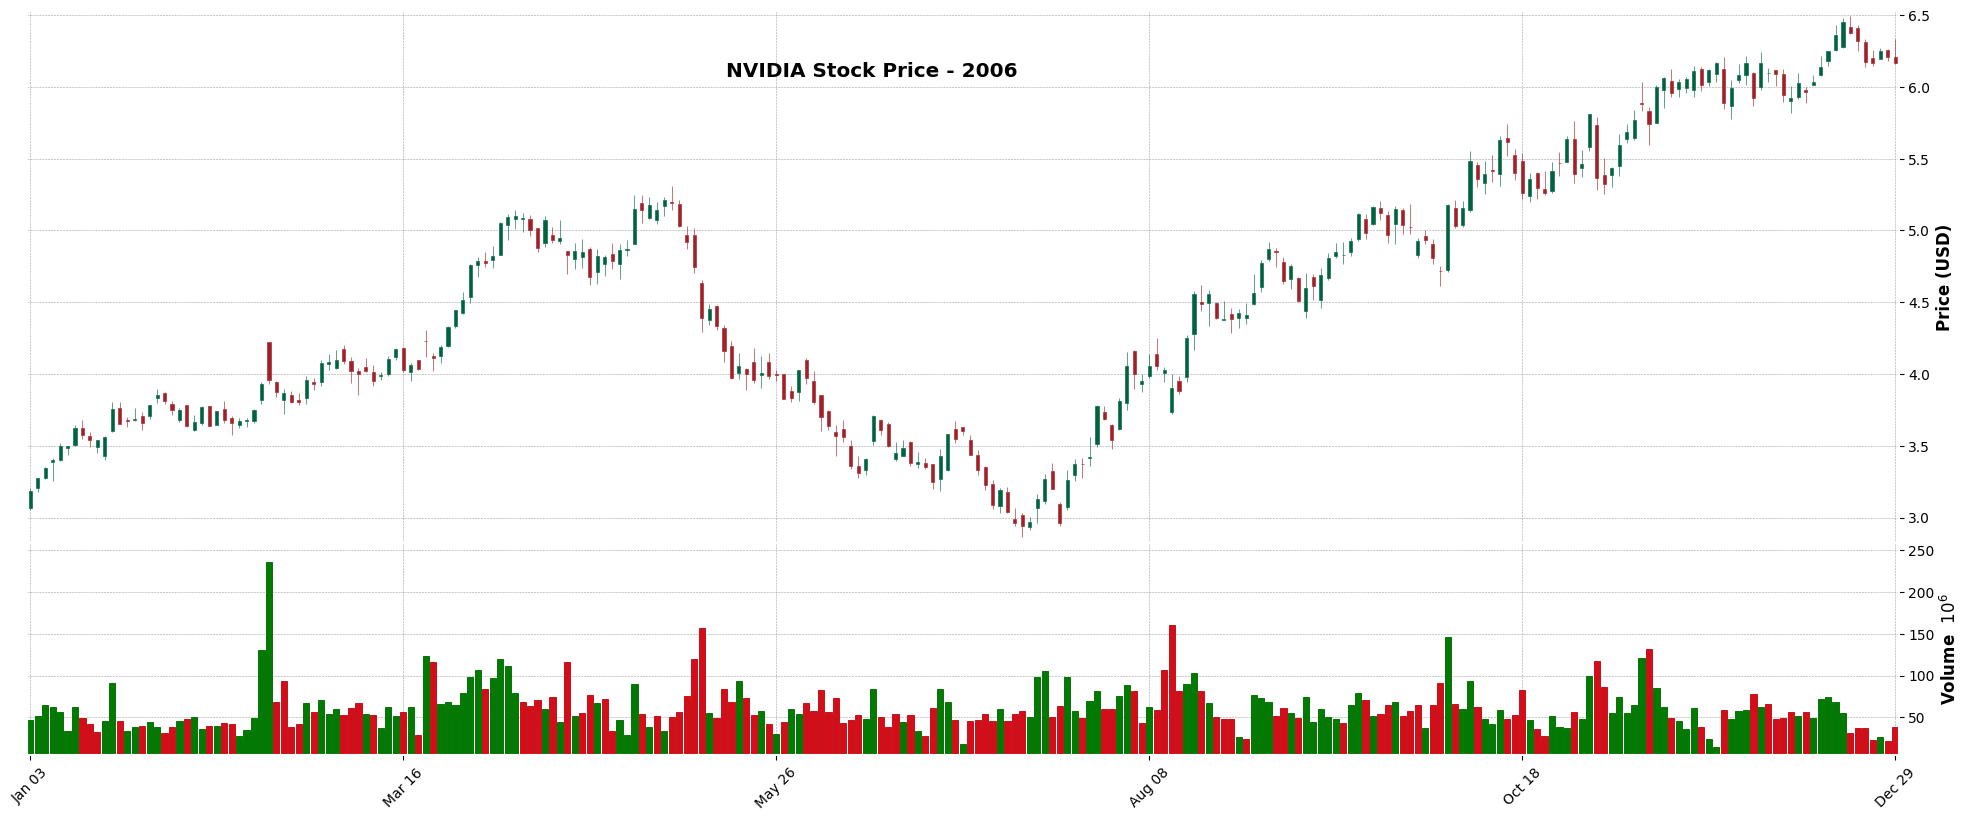

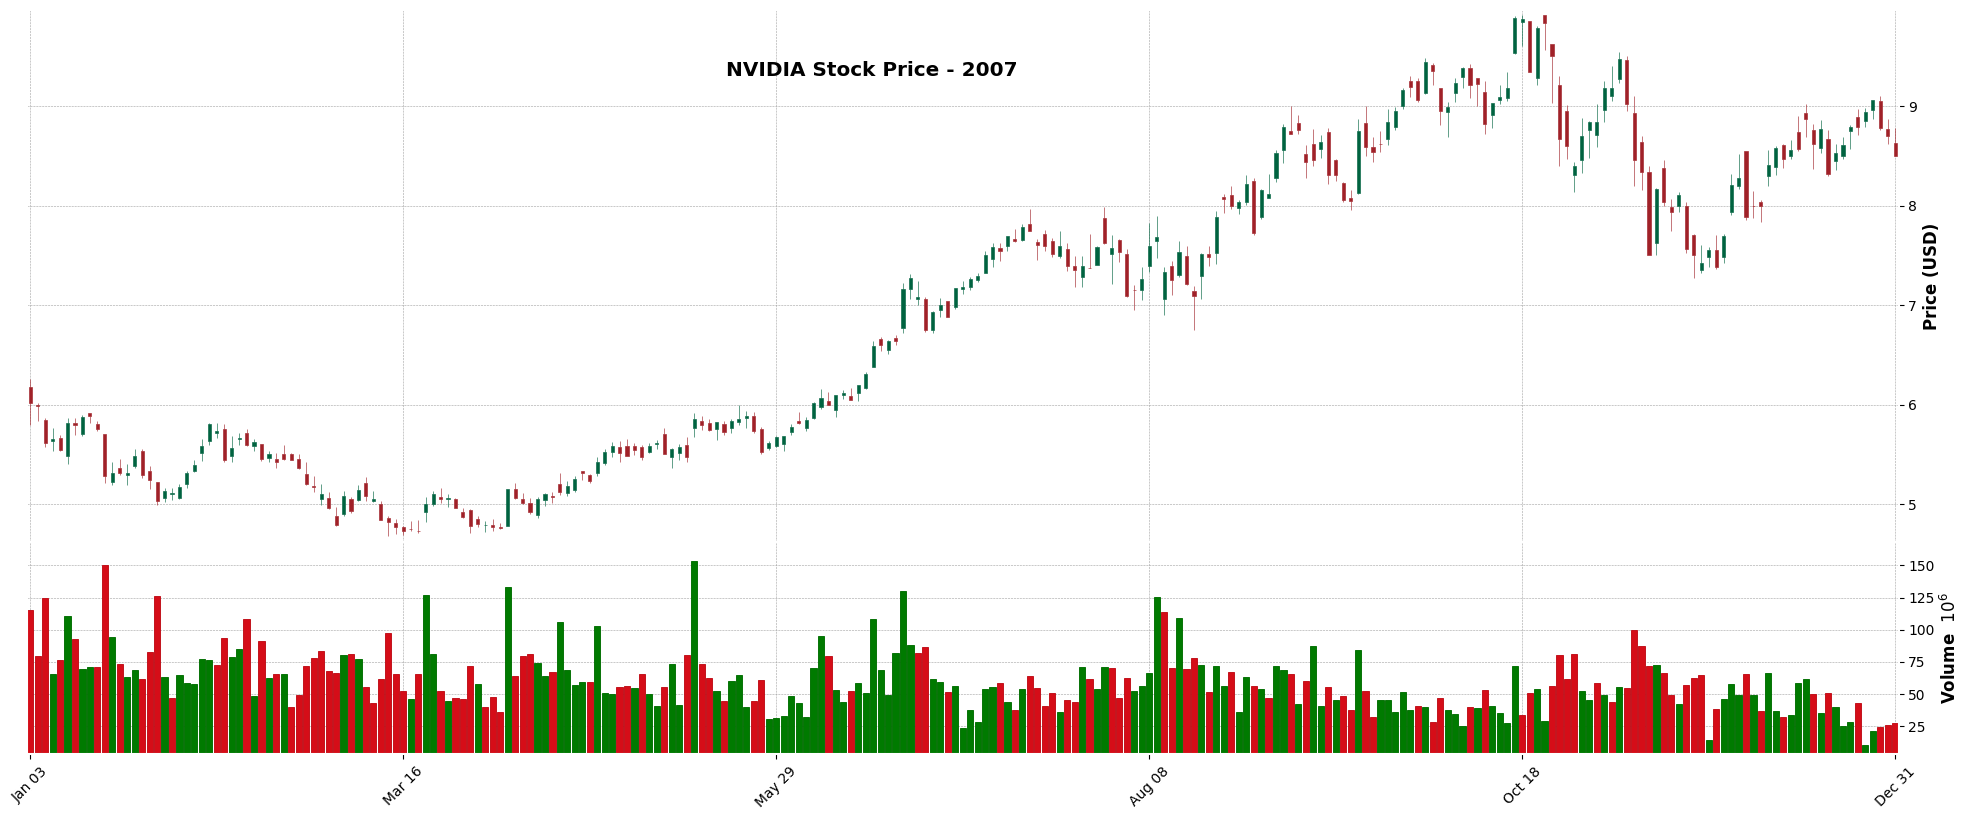

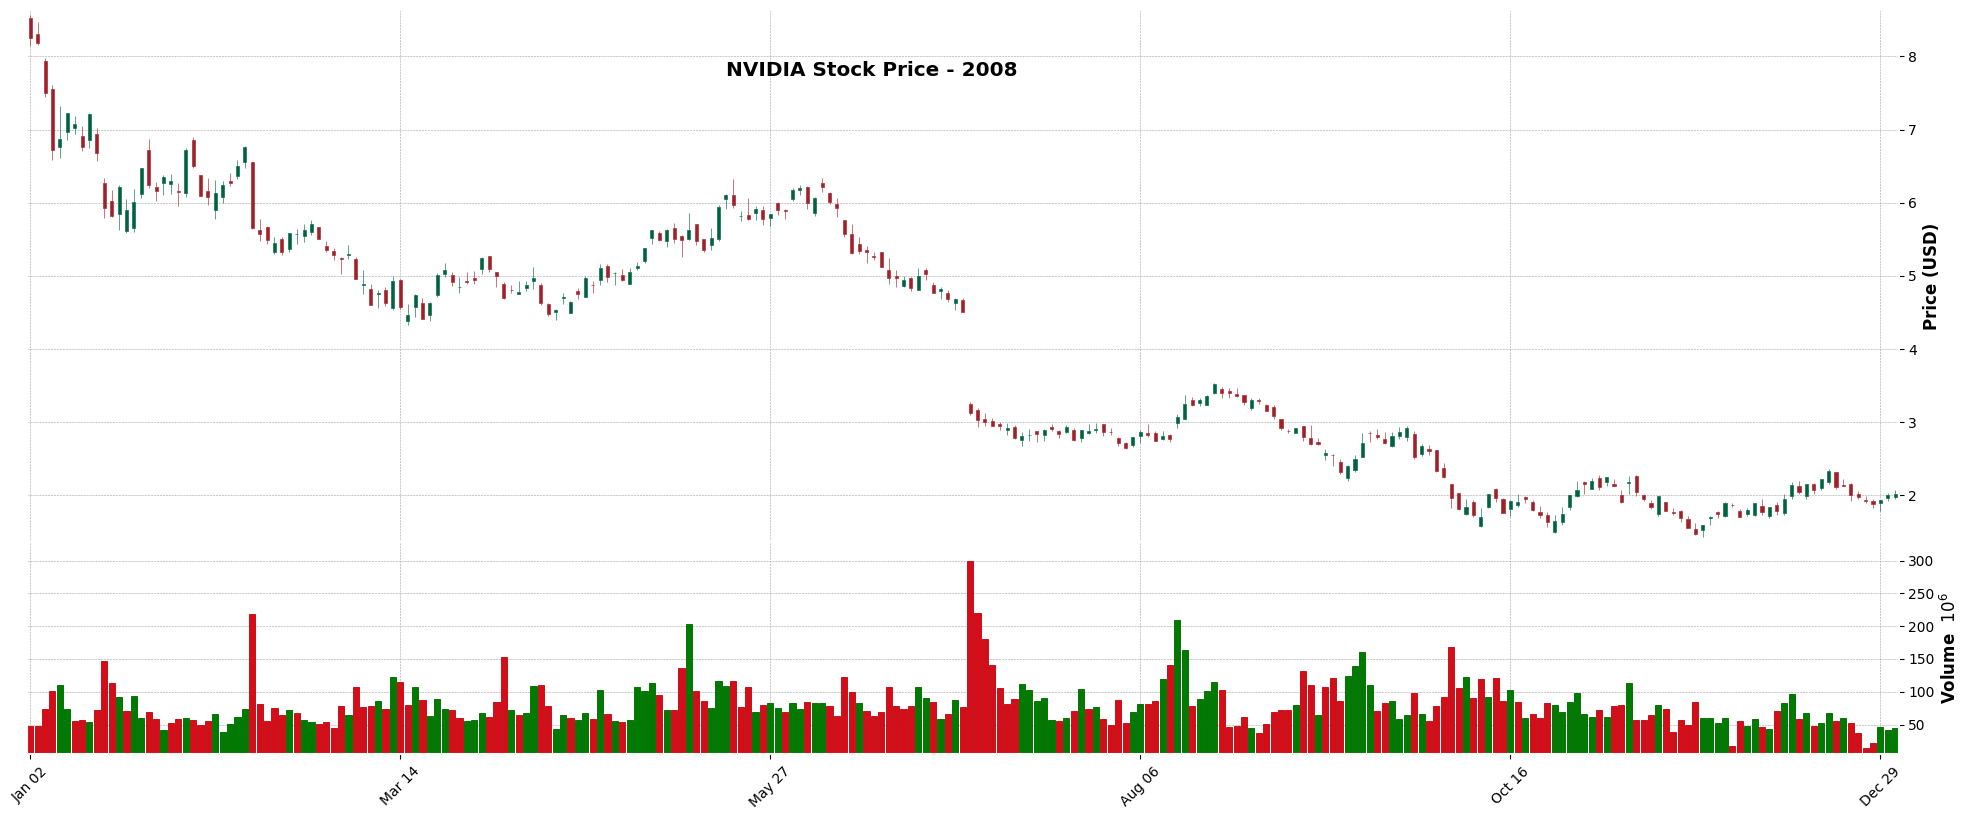

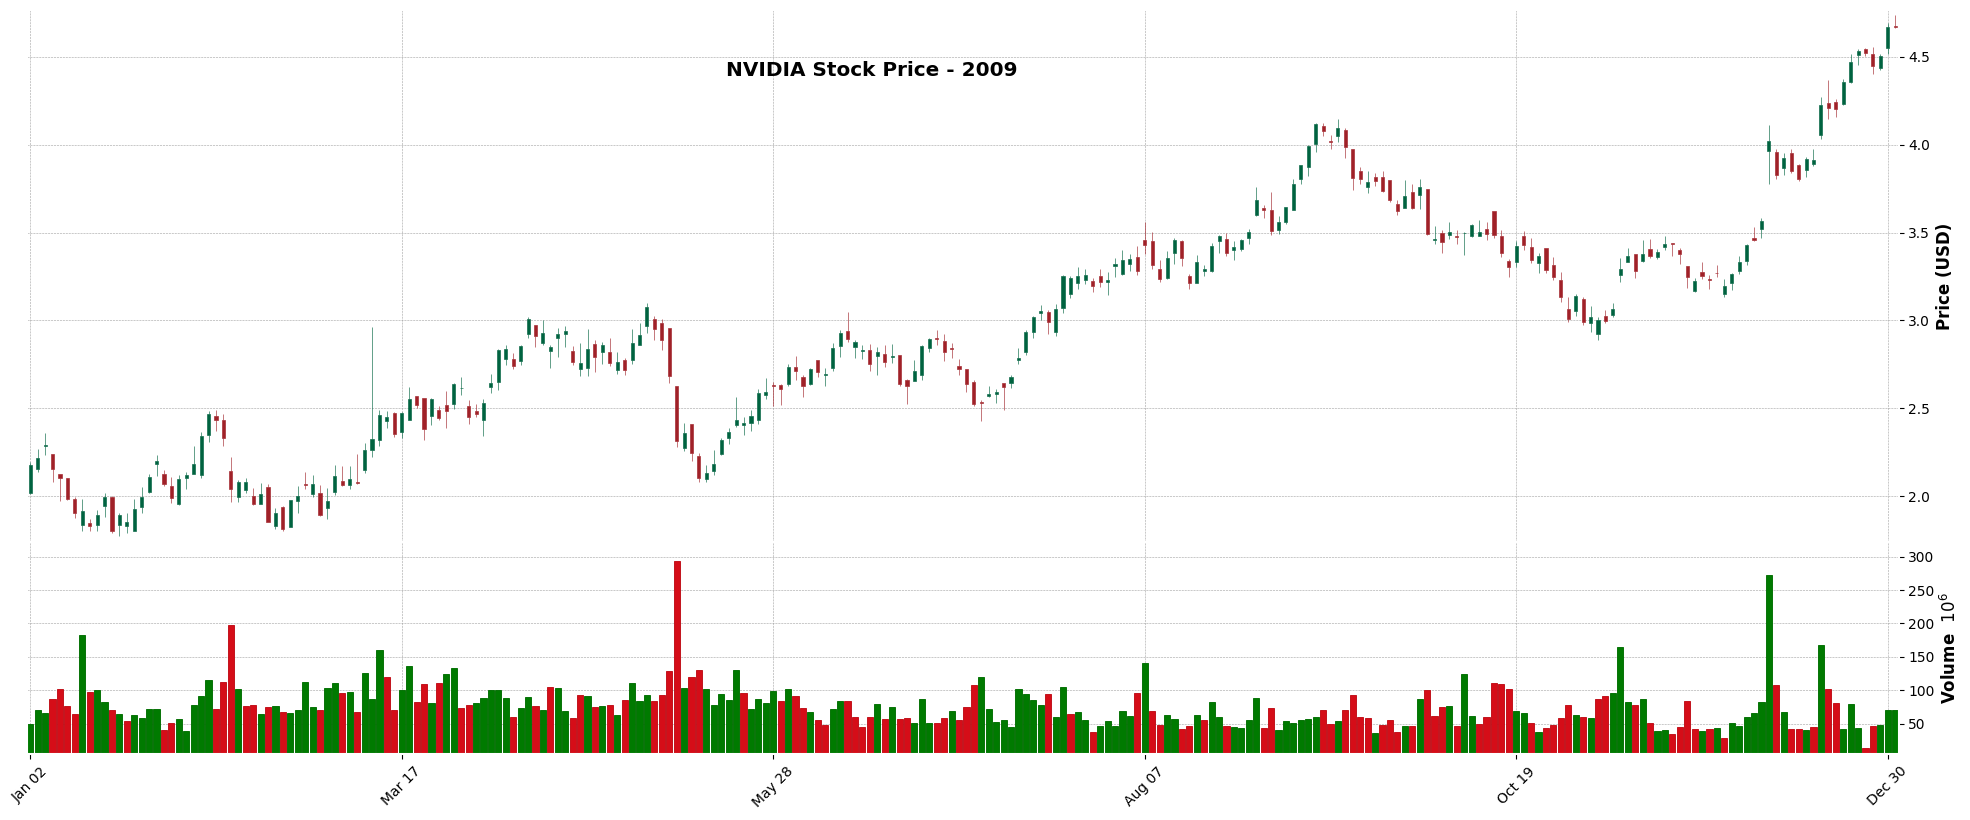

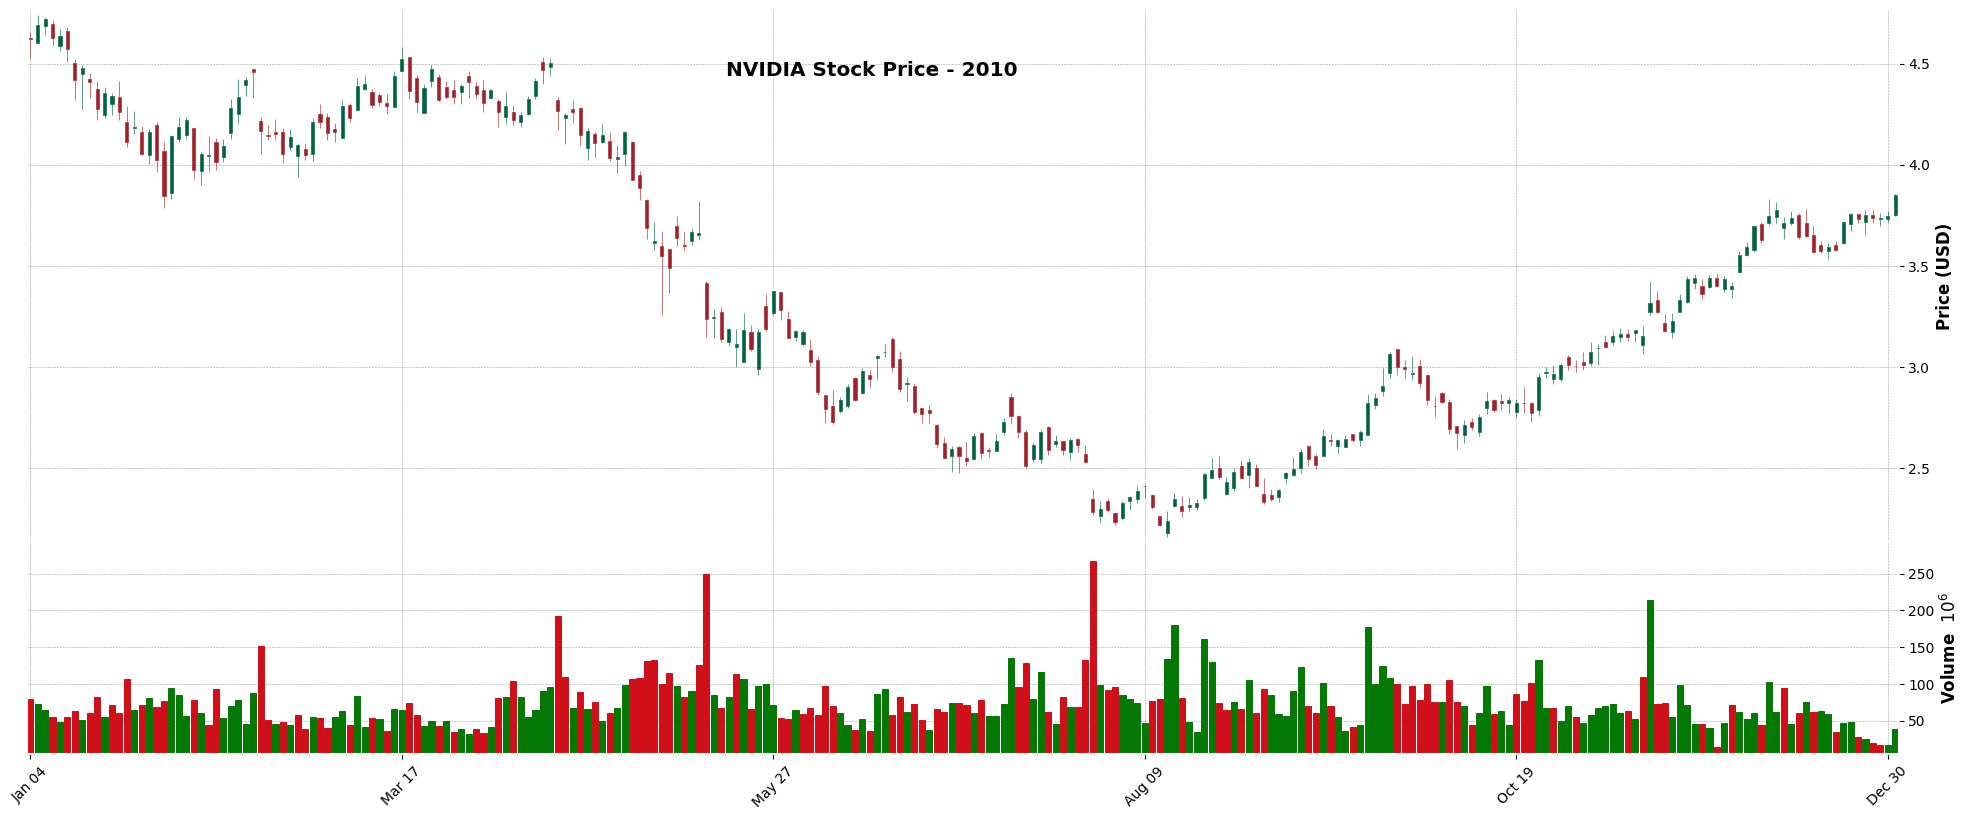

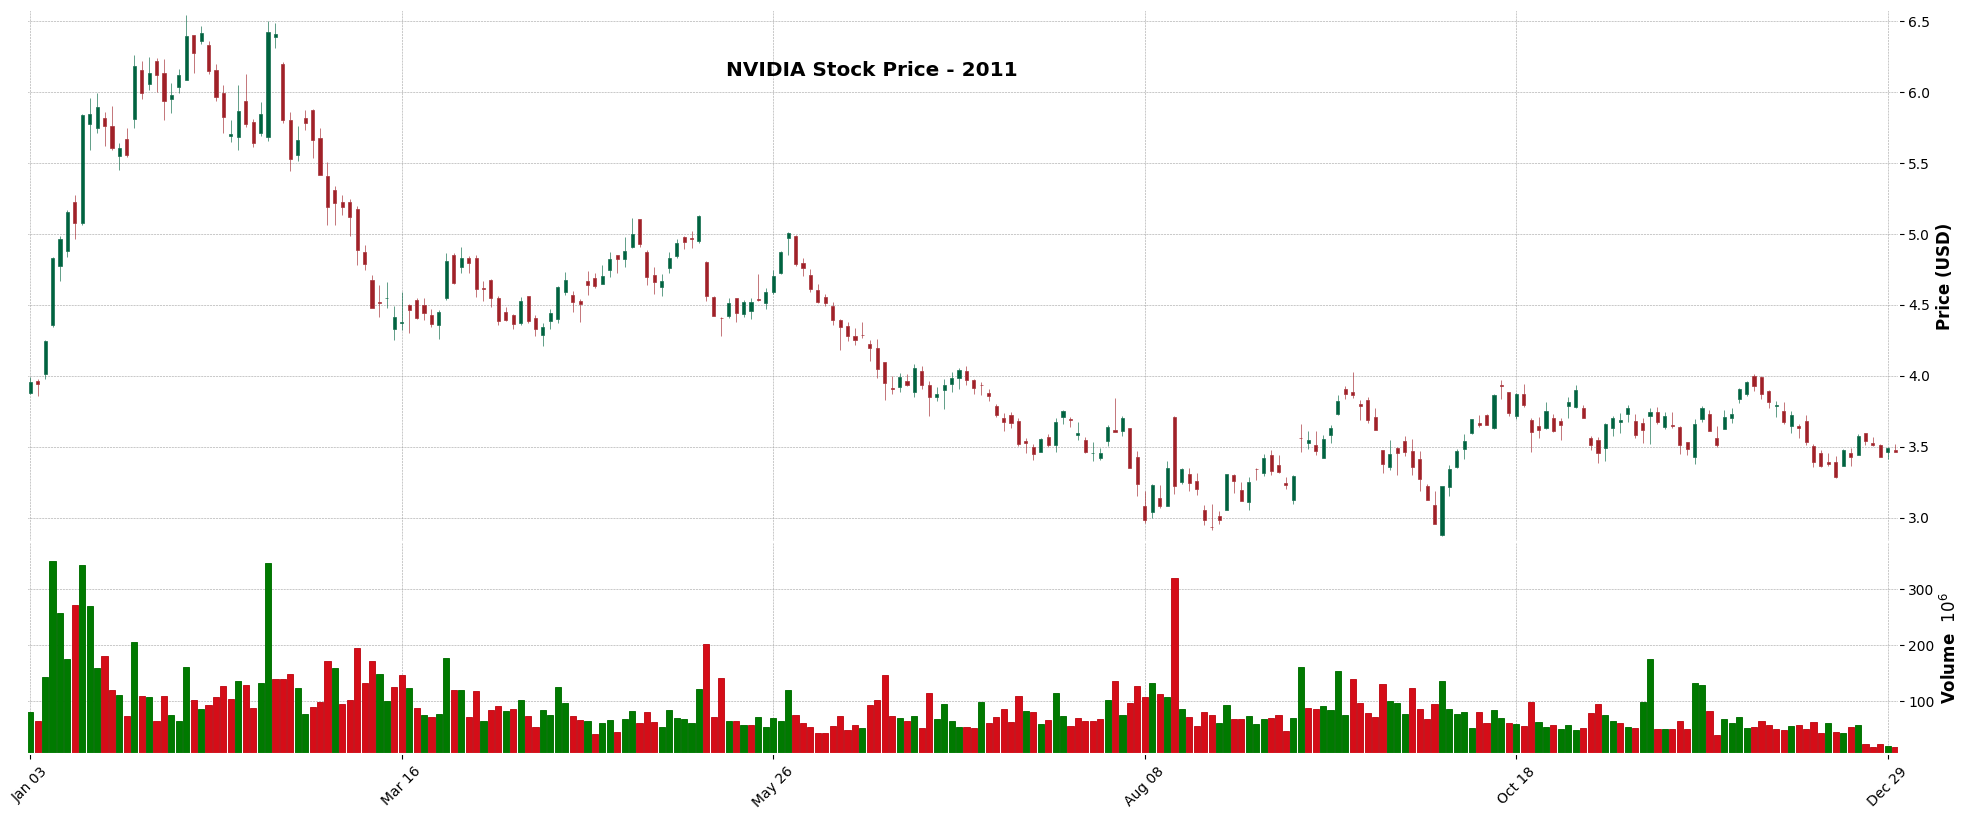

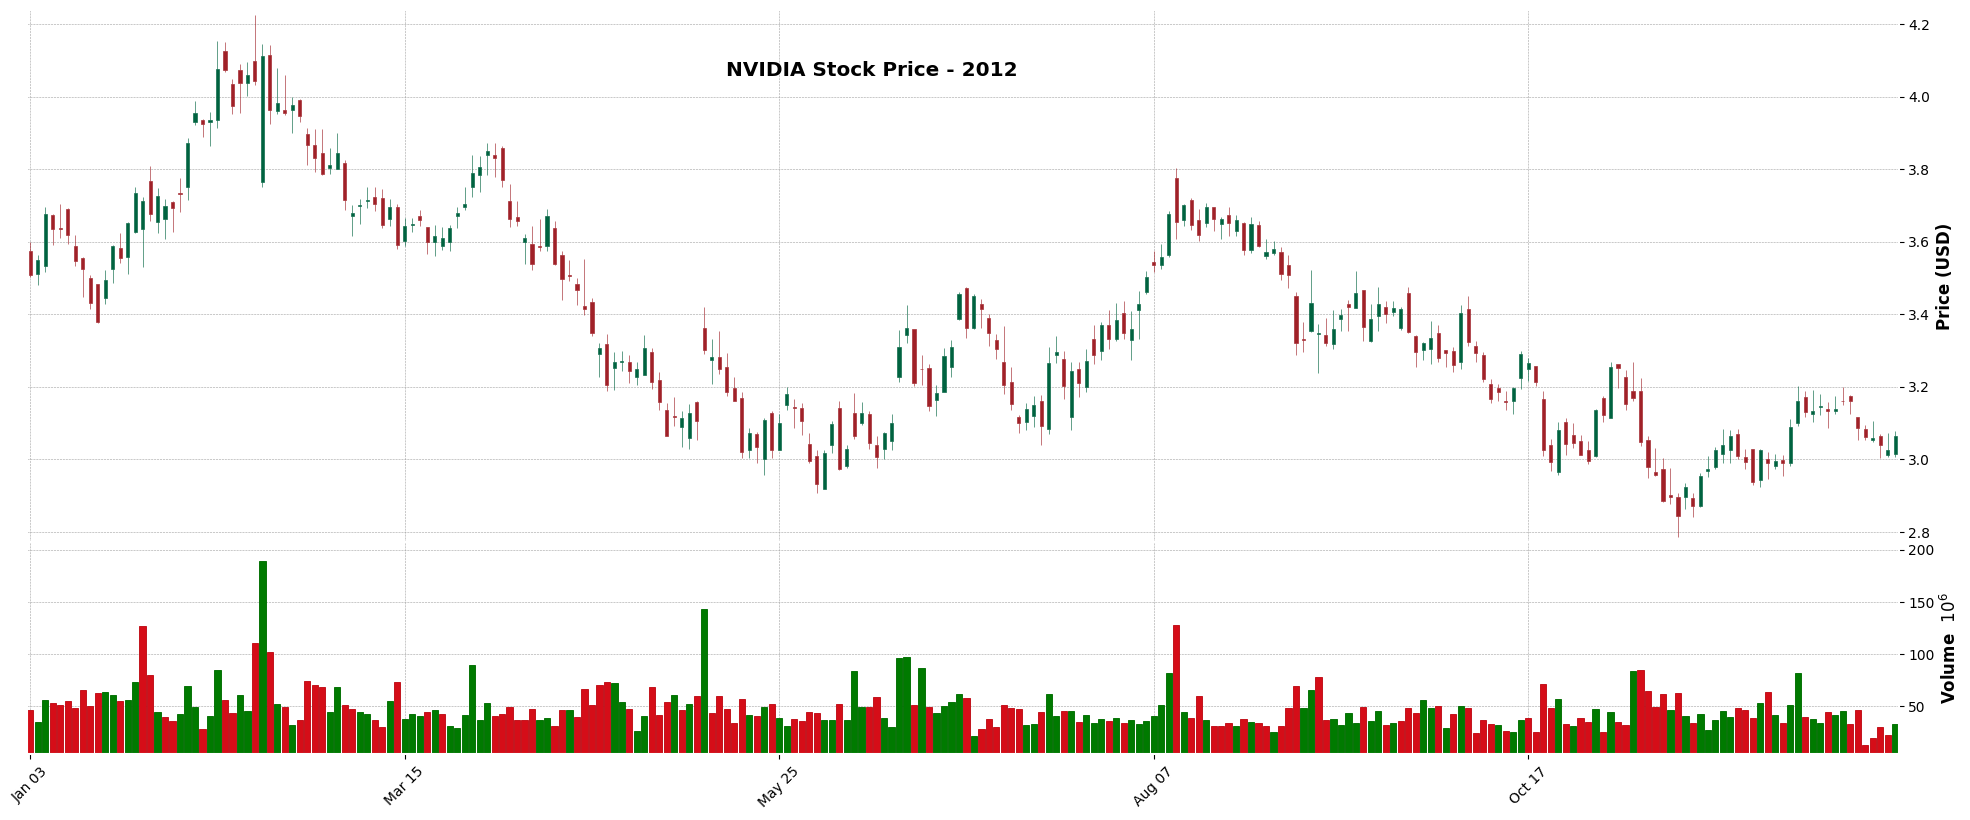

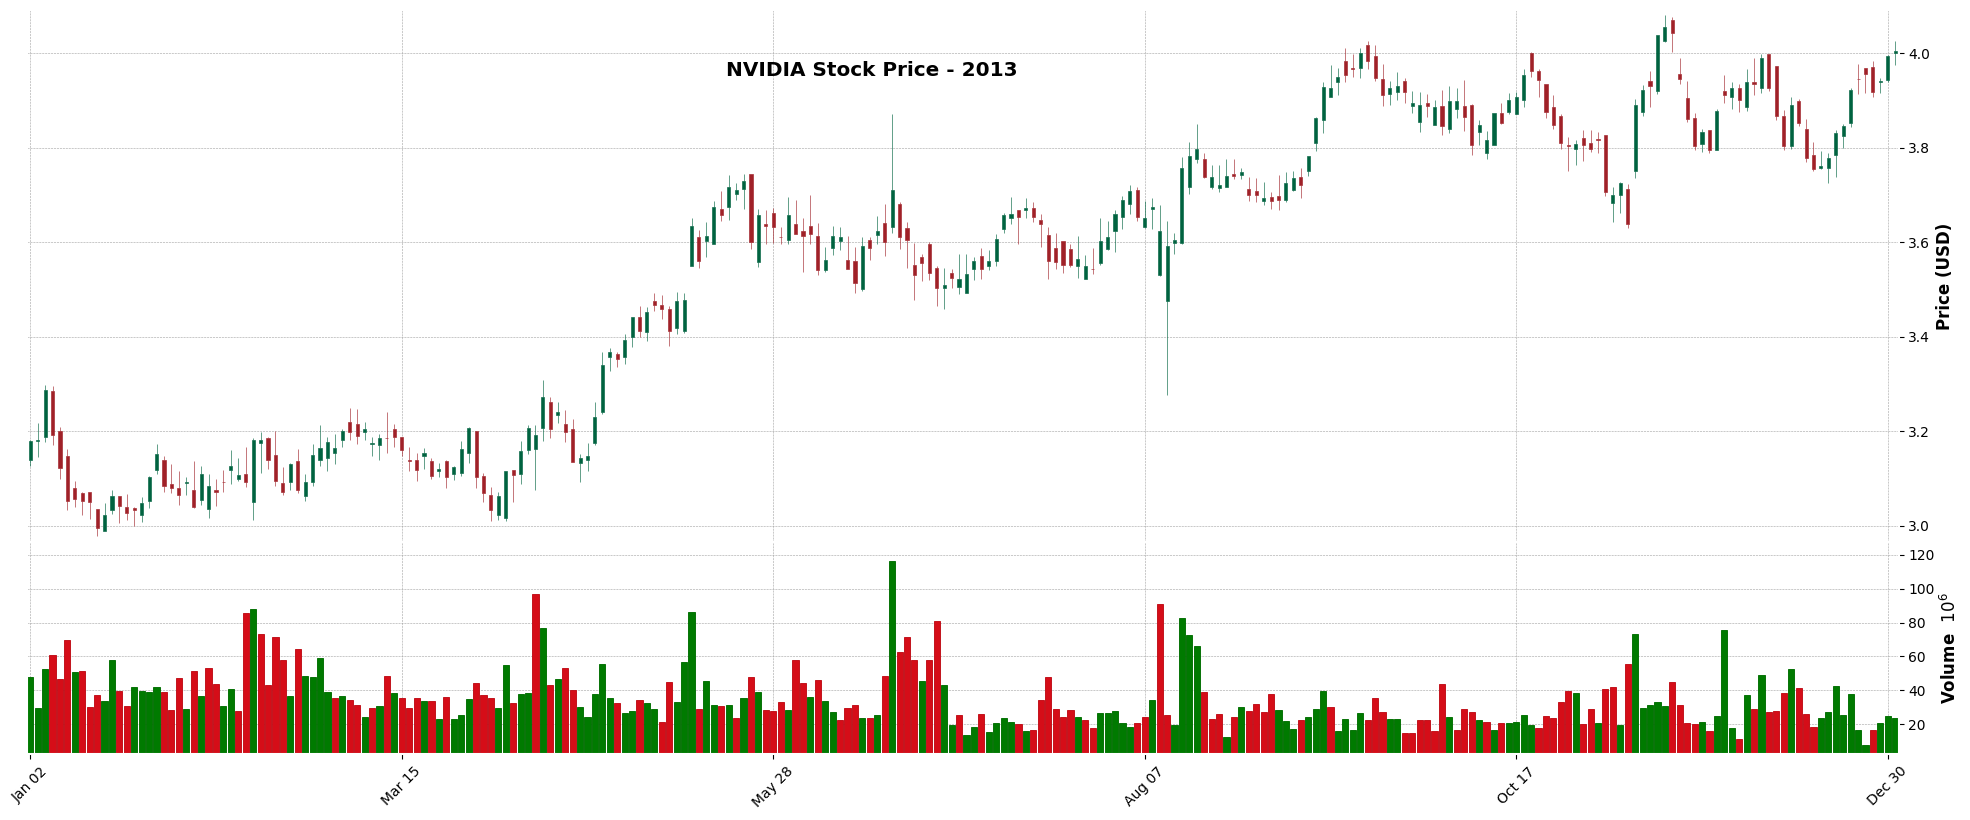

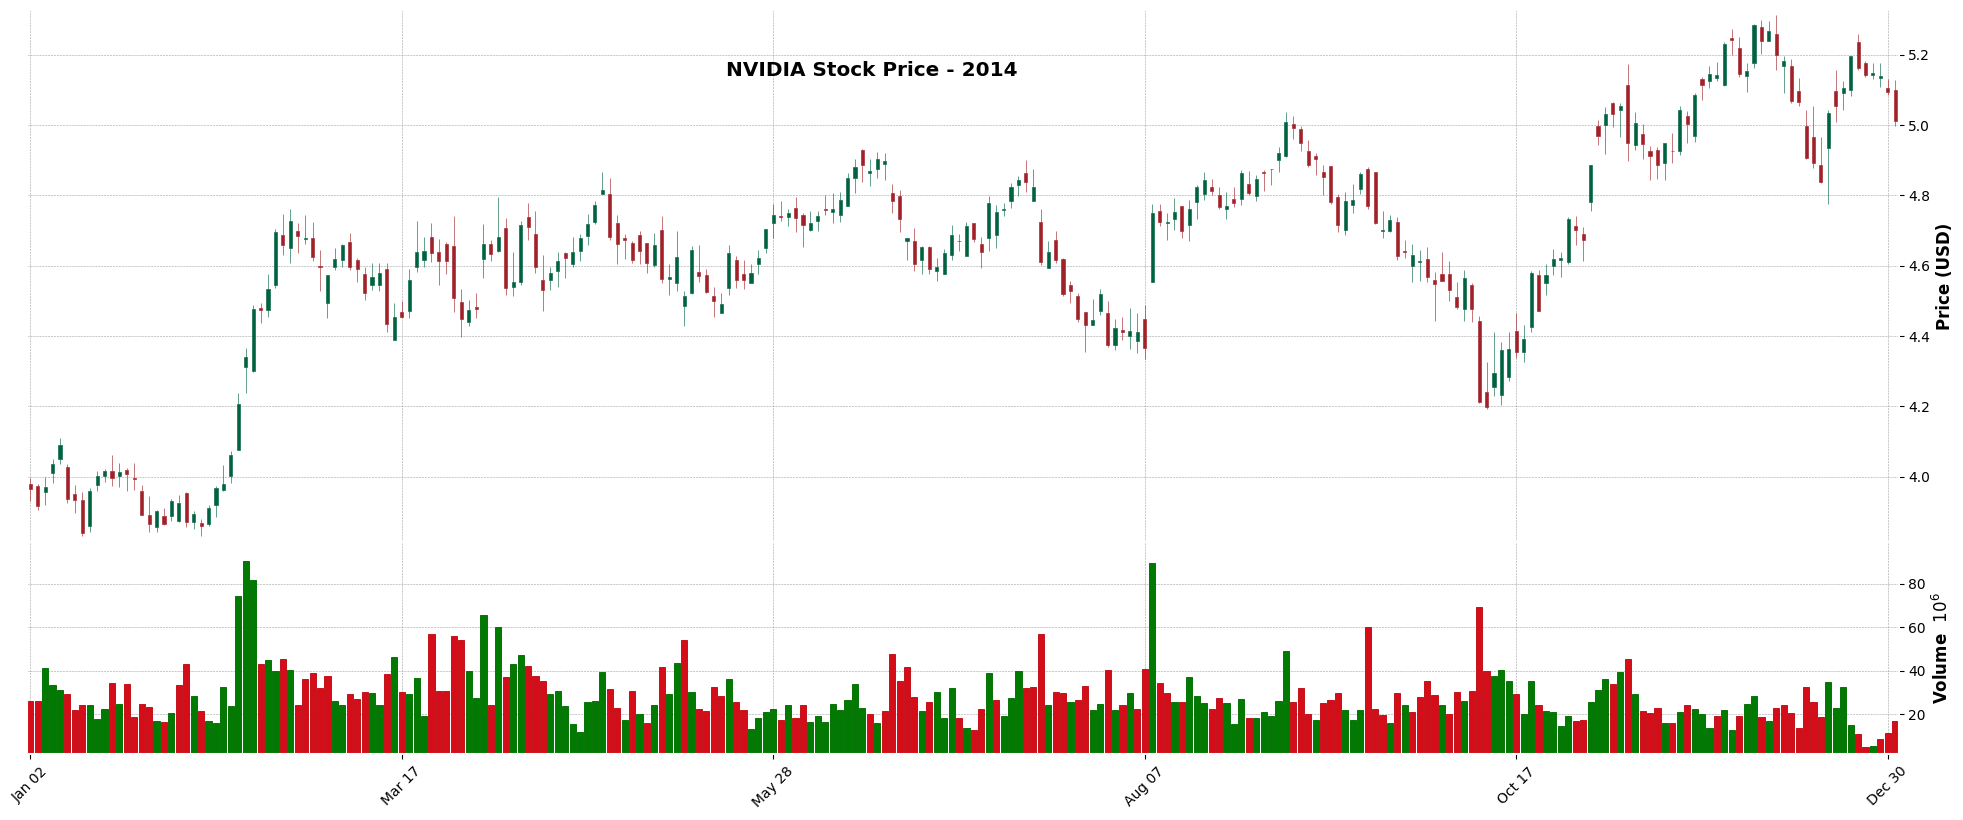

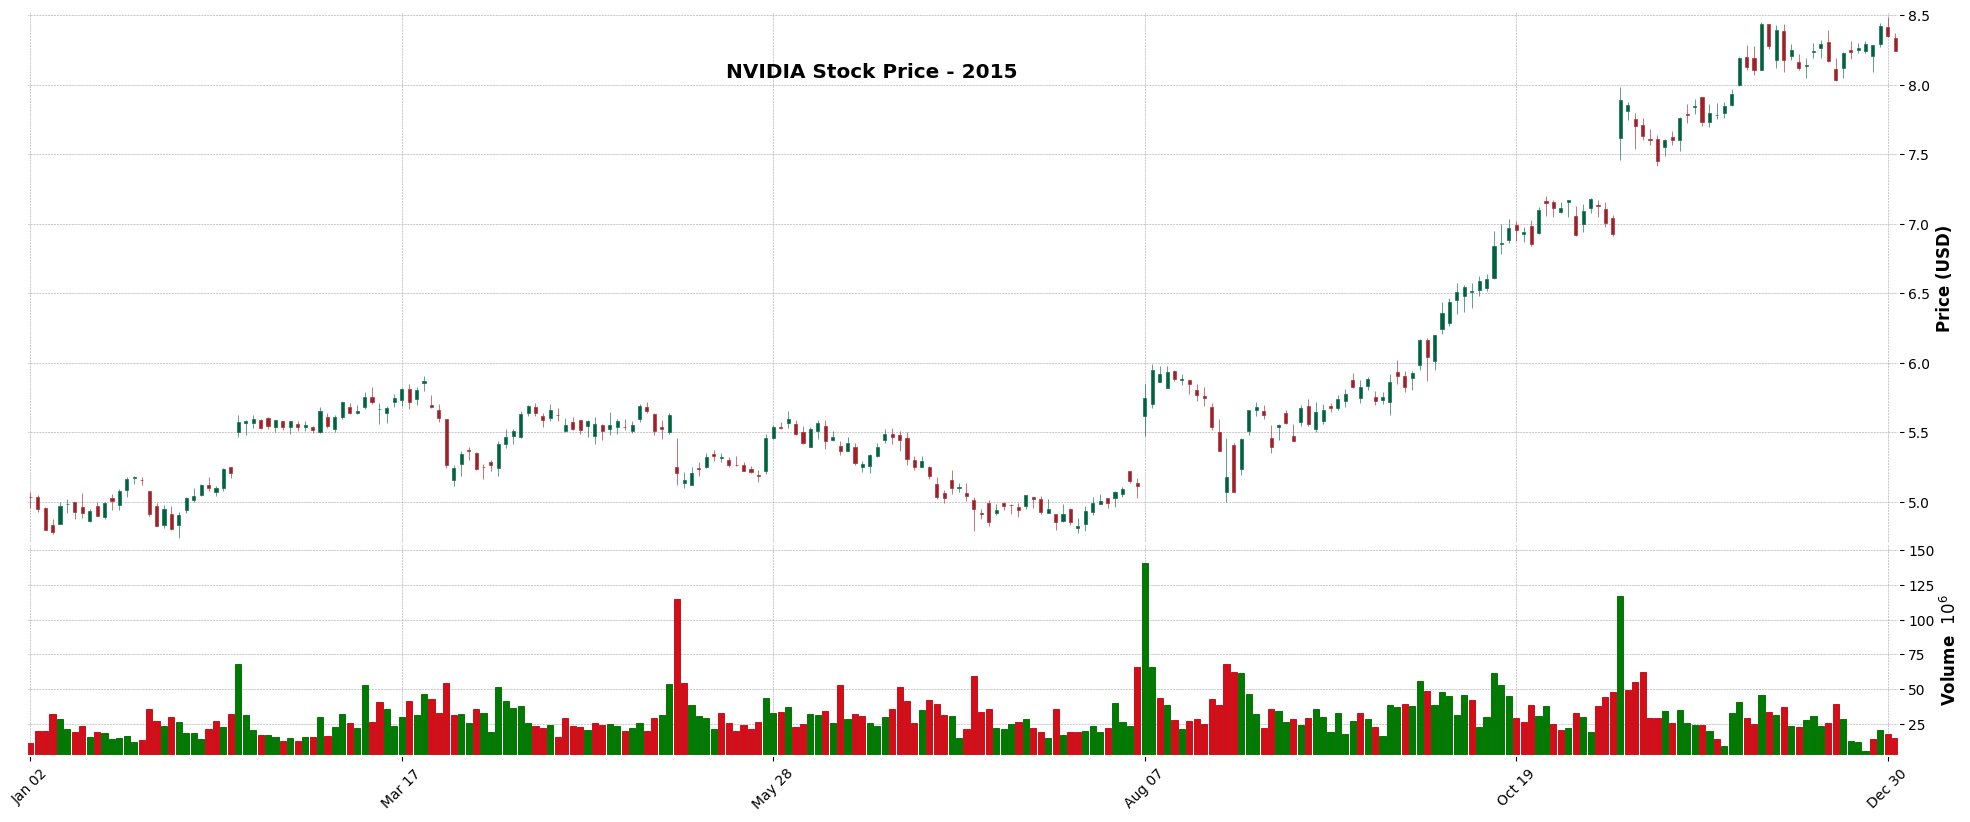

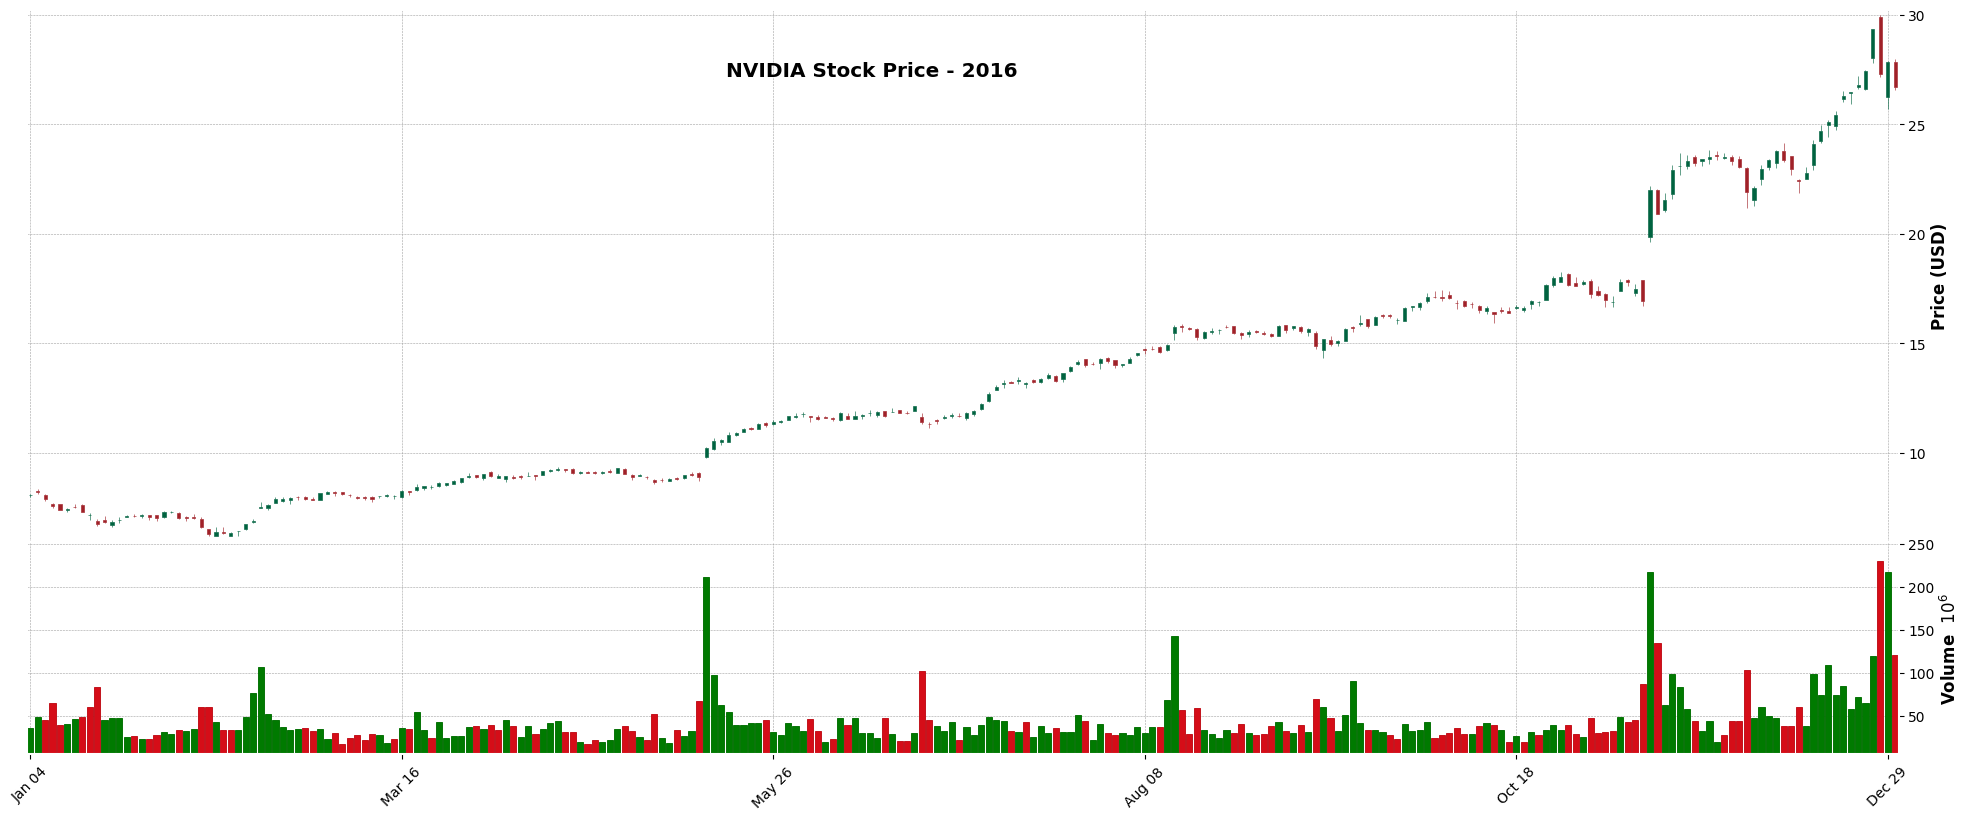

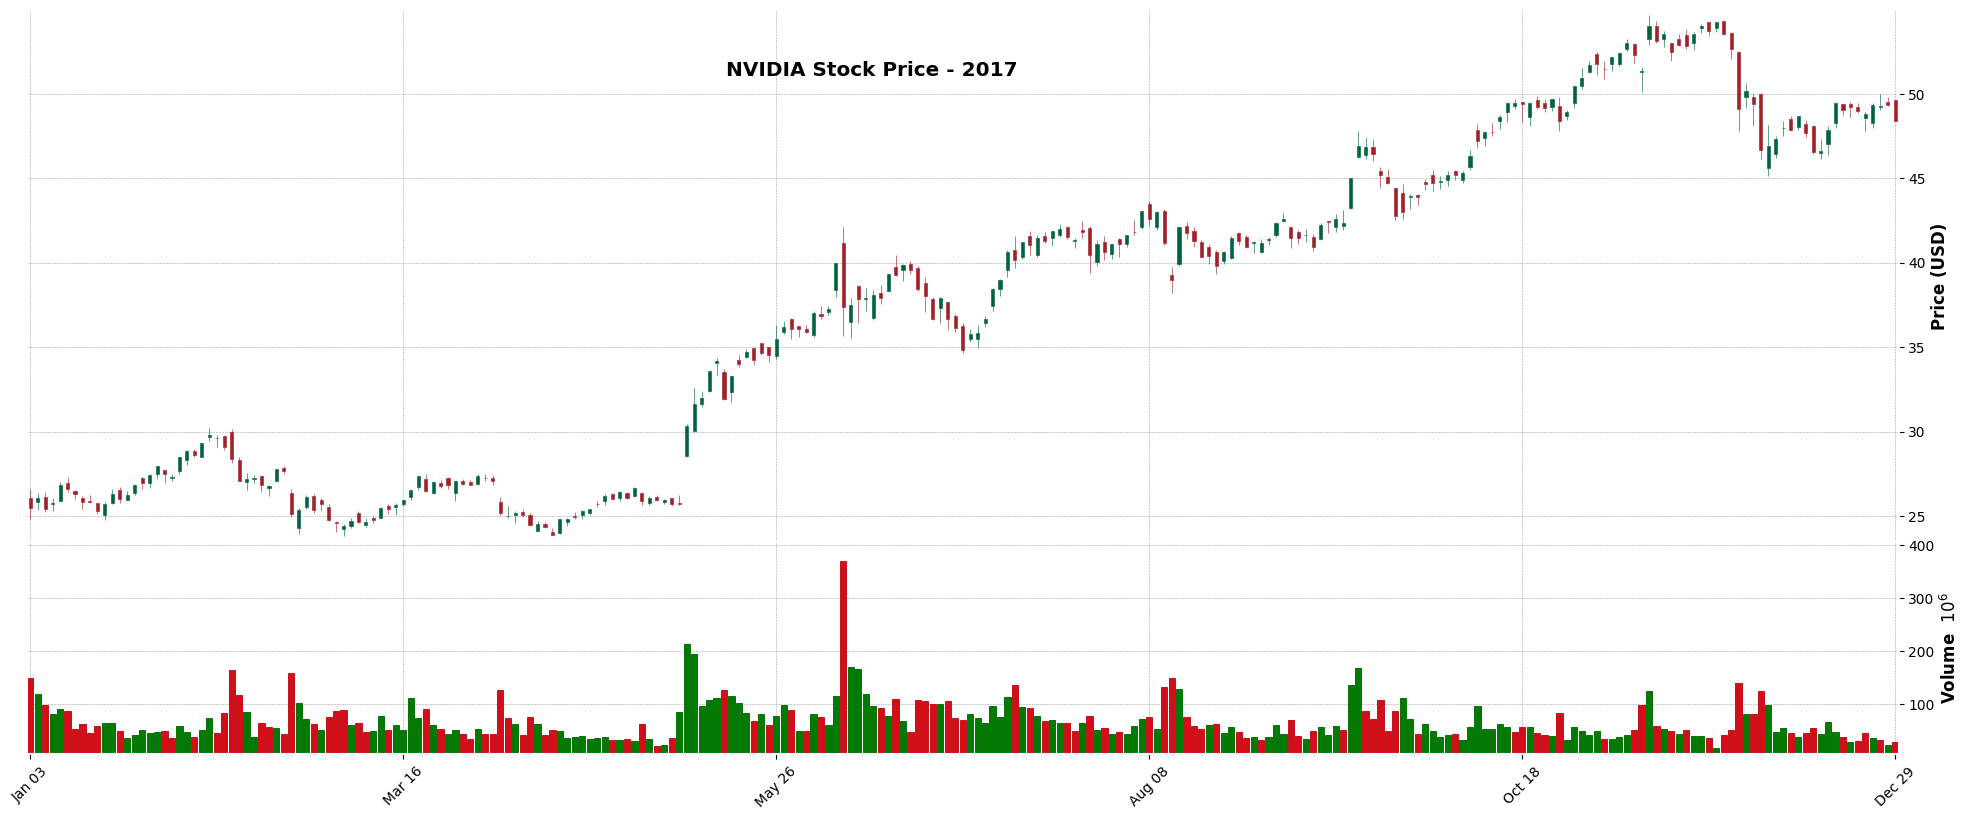

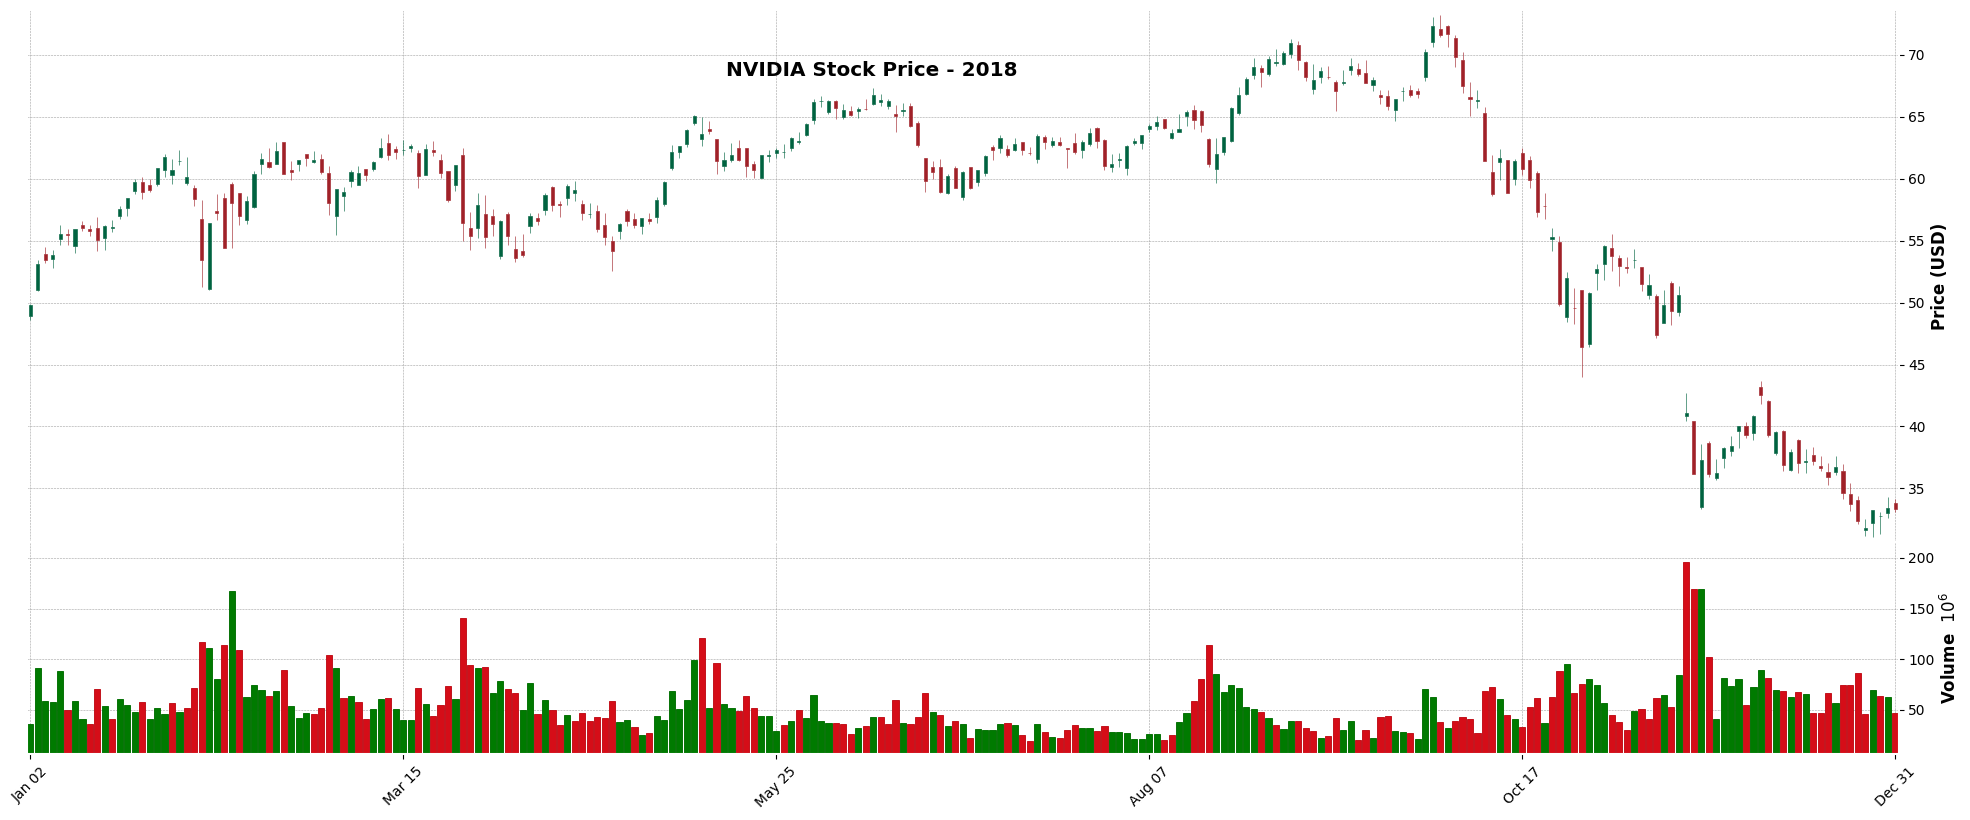

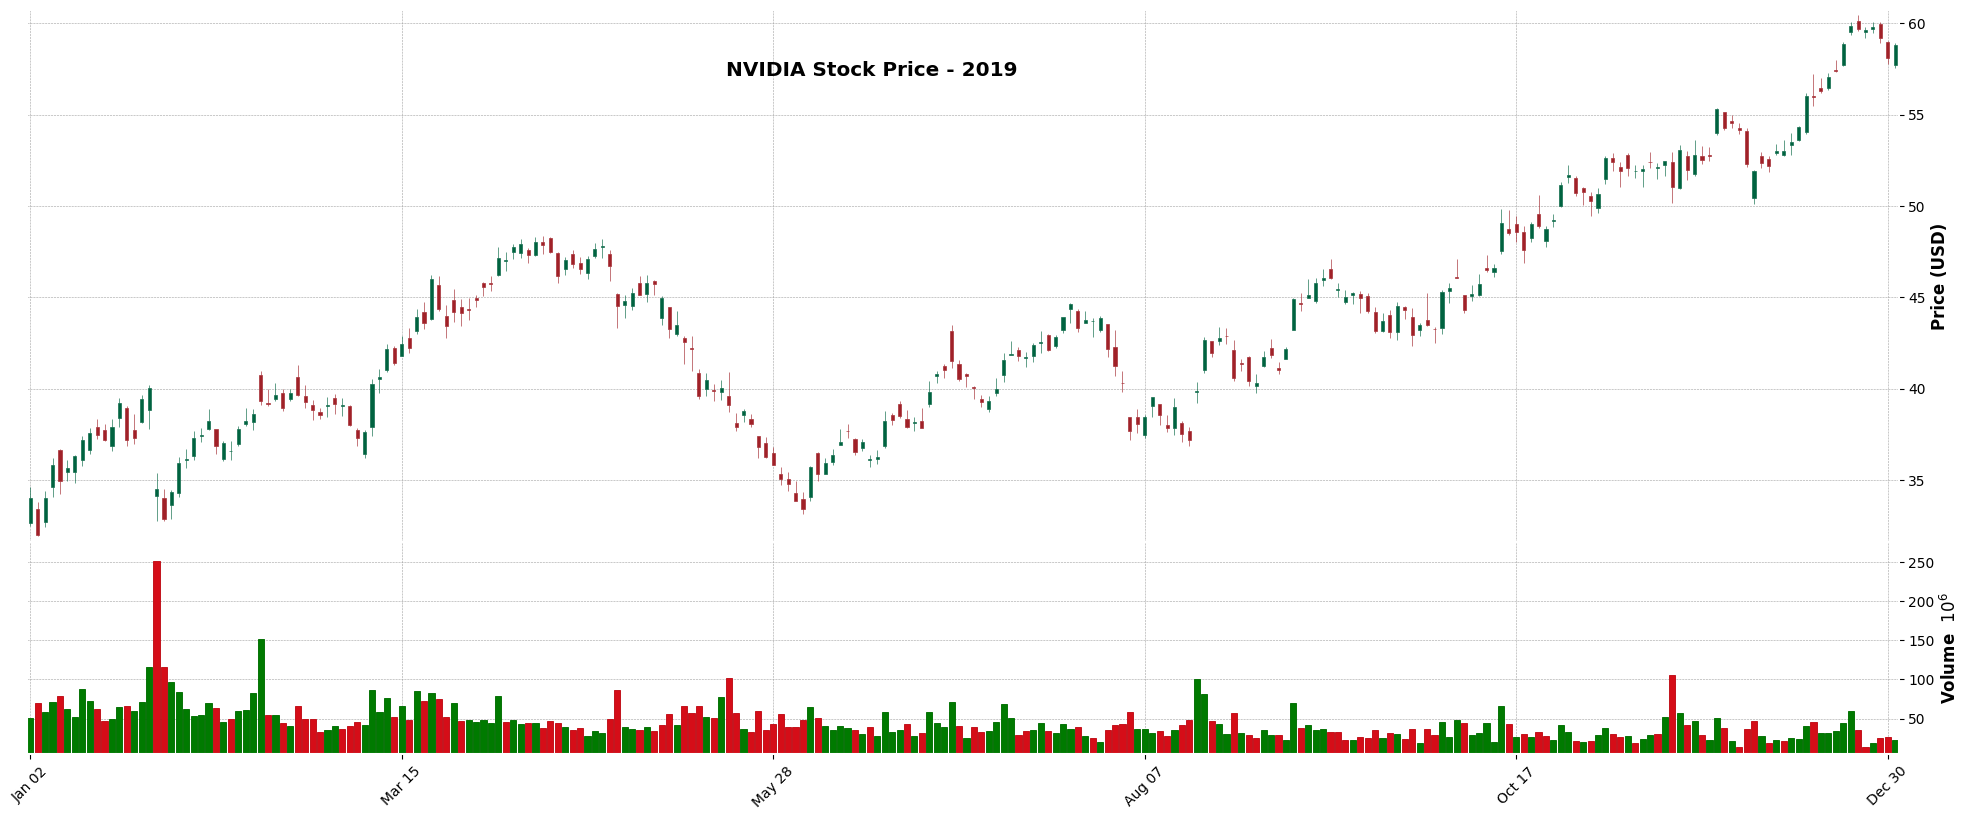

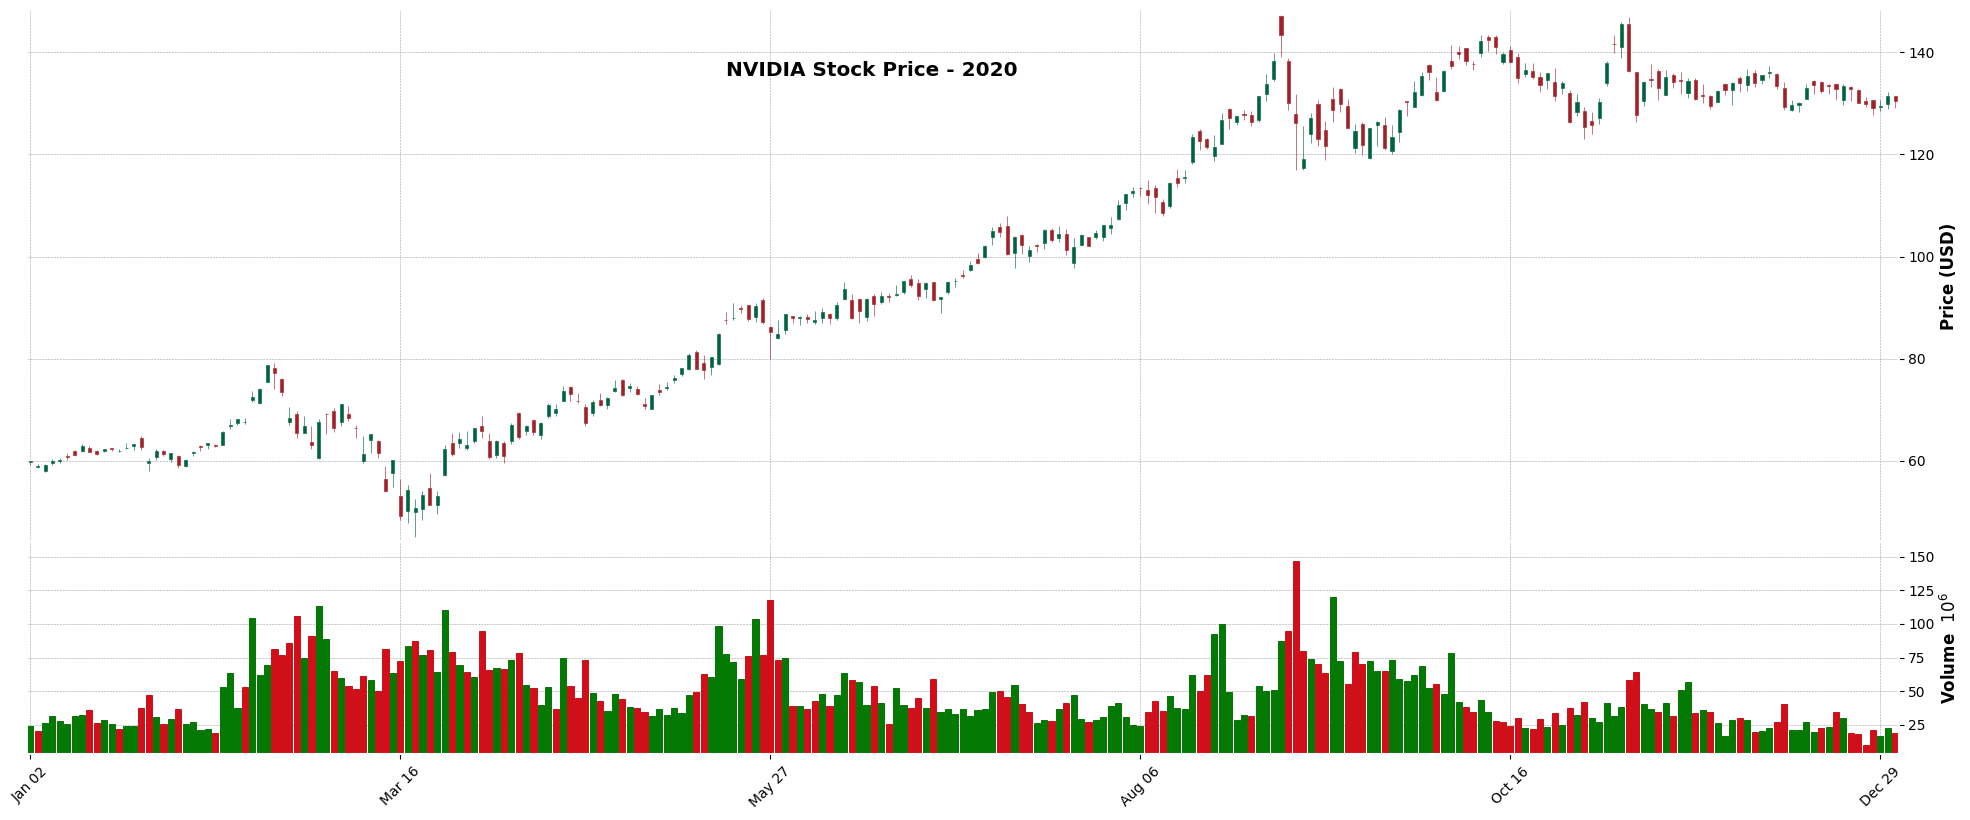

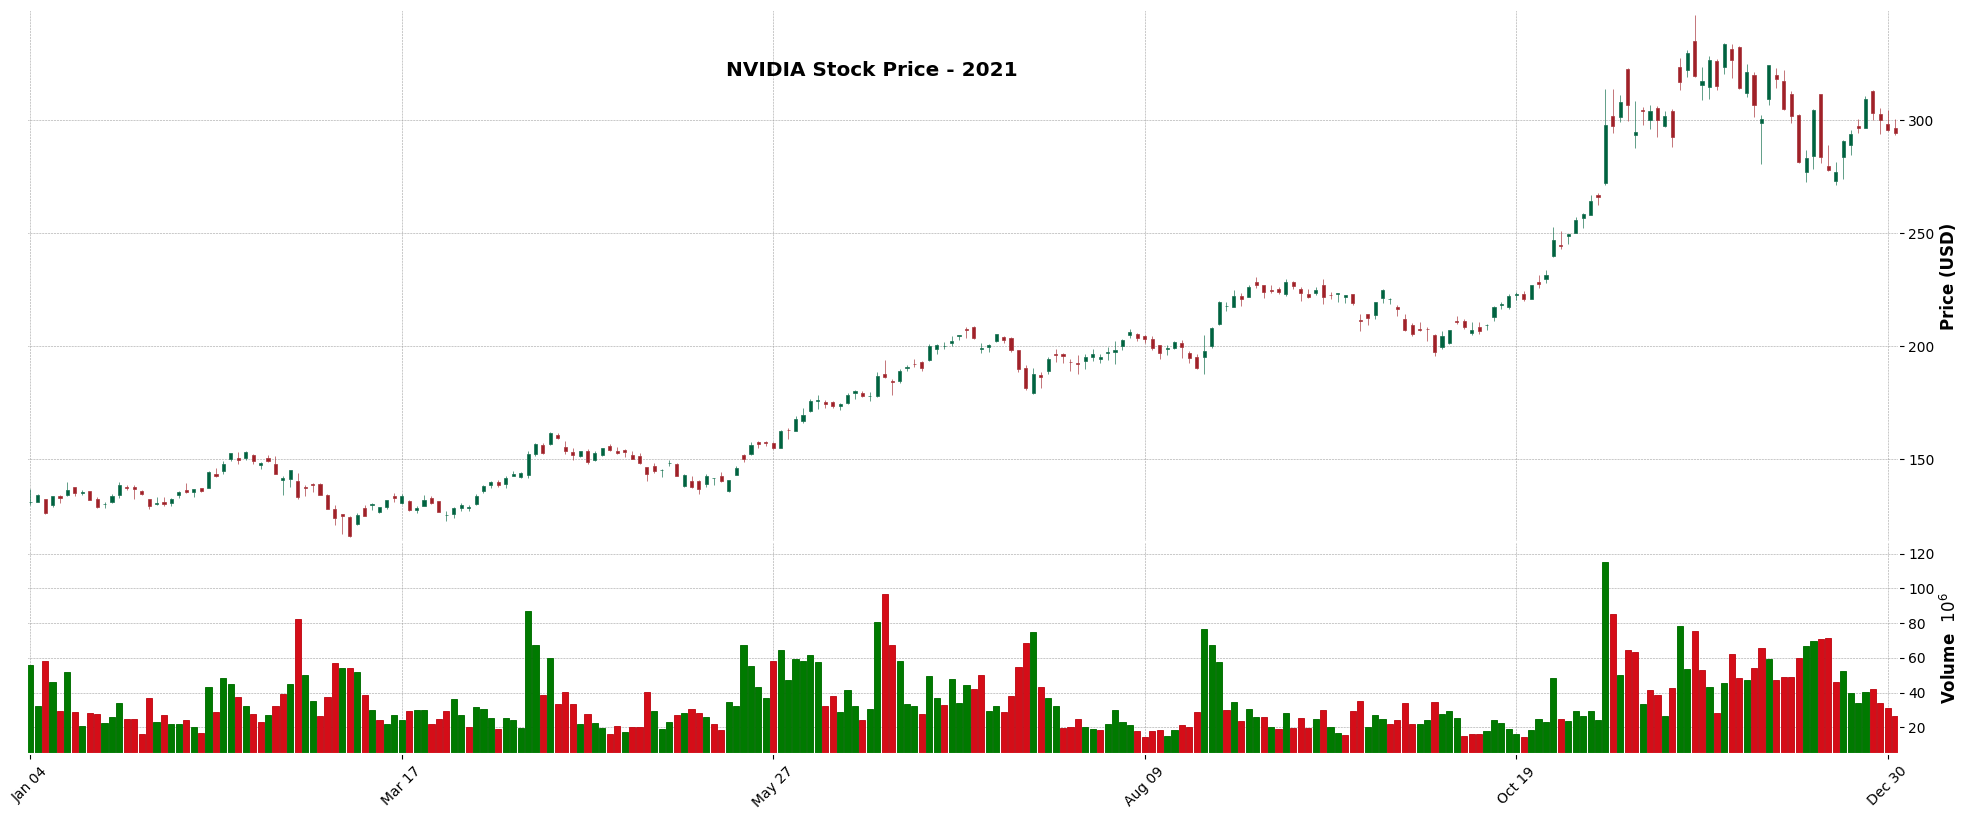

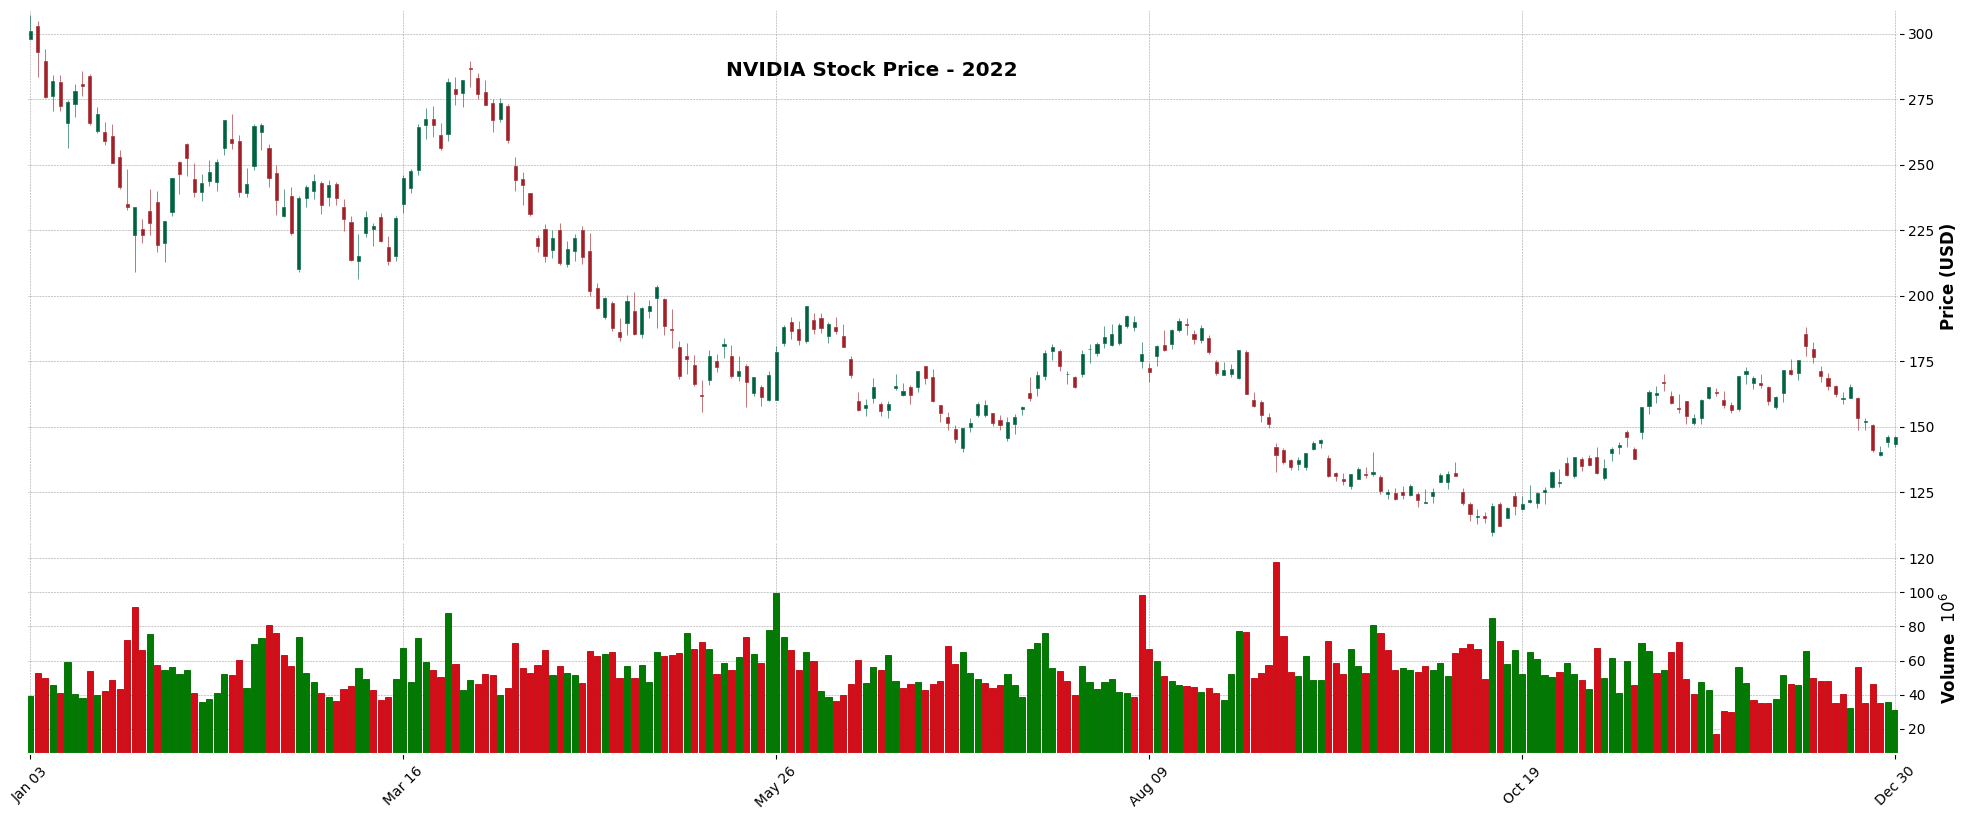

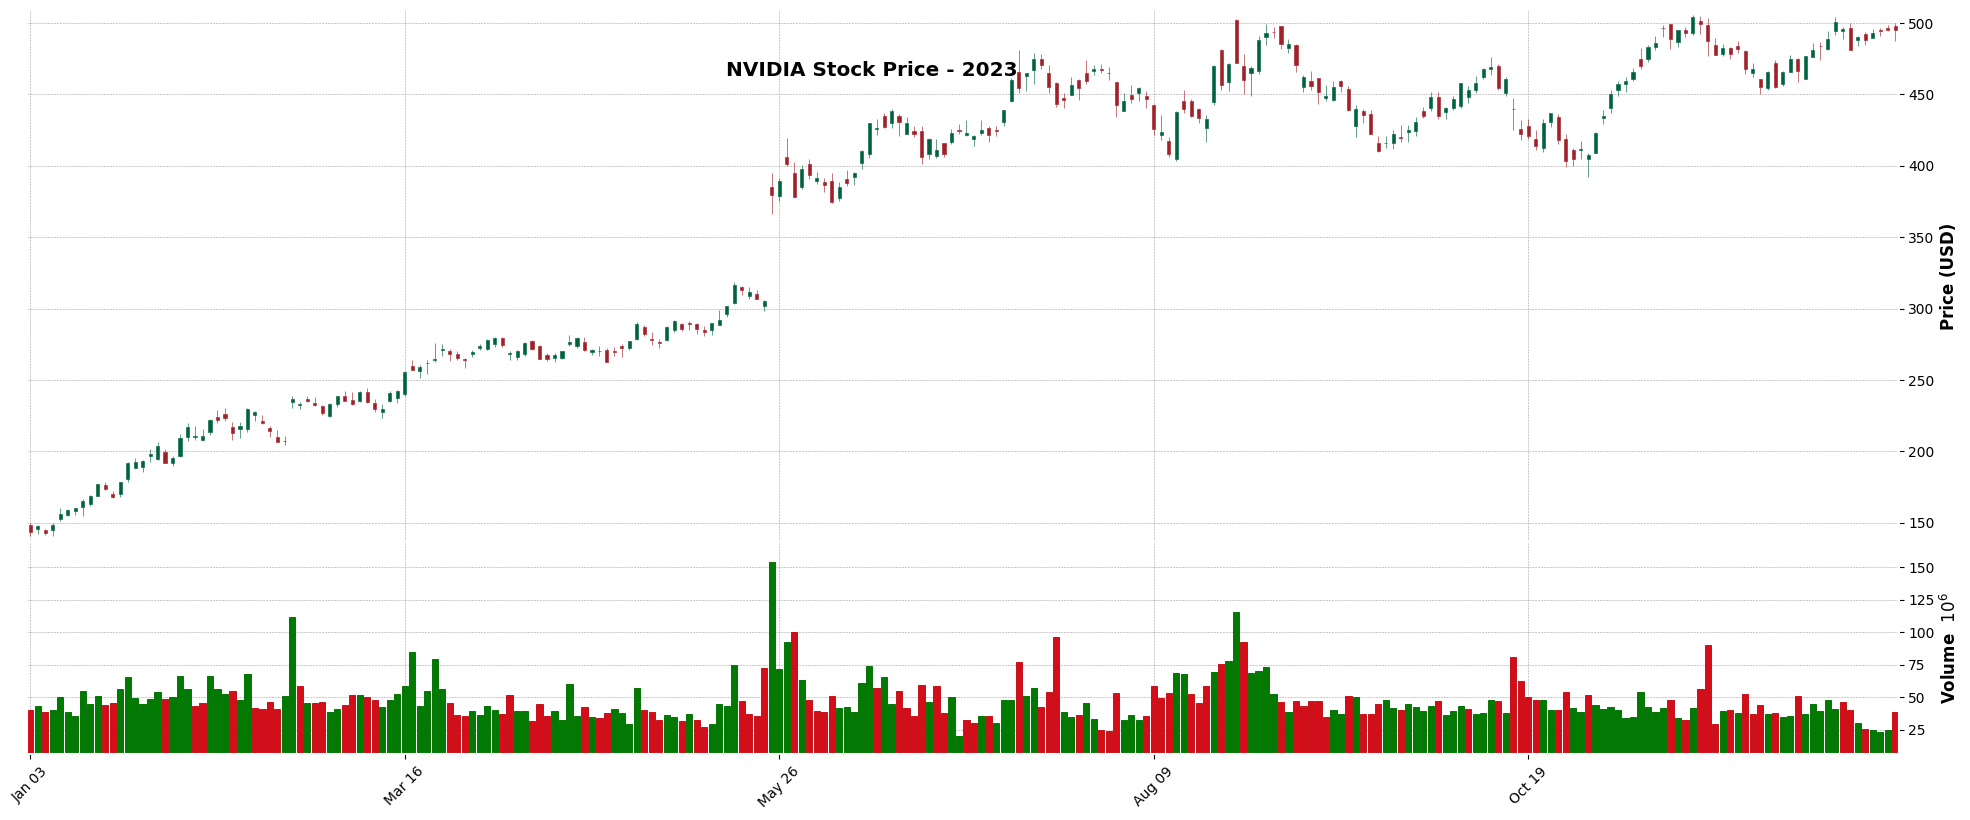

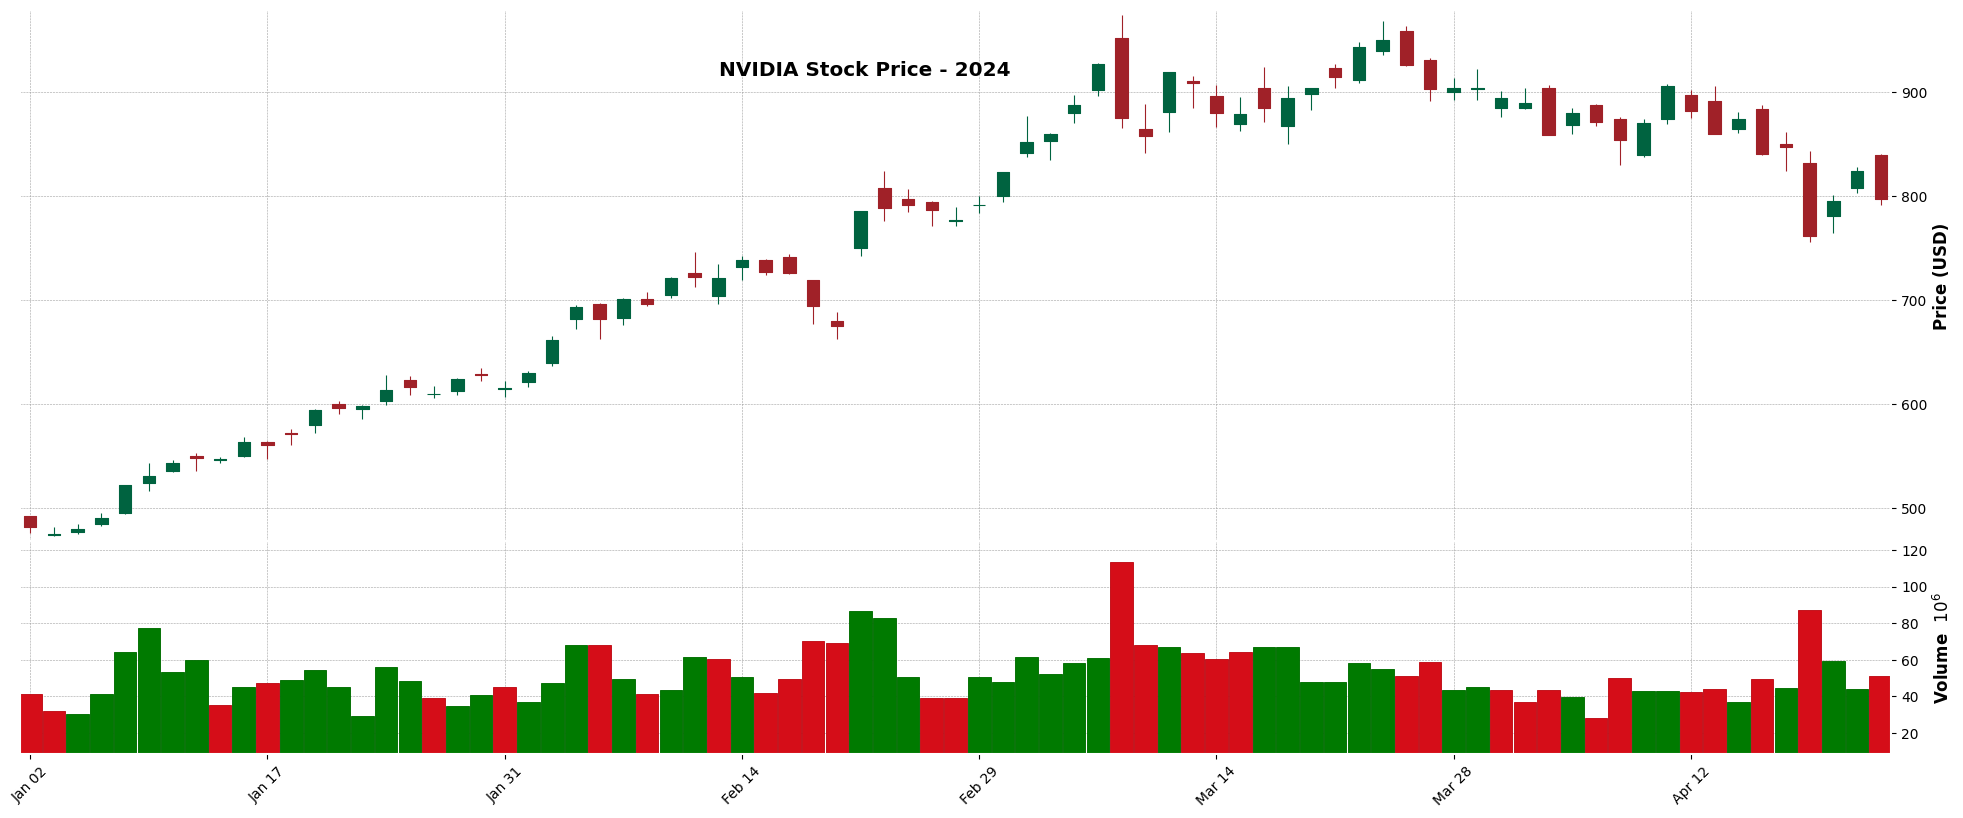

In [69]:
# Now let's integrate the highs and lows of the stock prices into a new candlestick chart.
import mplfinance as mpf

# Prepare the data for candlestick chart in yearly format
# We will use the 'Open', 'High', 'Low', 'Close' prices and 'Volume' for the candlestick chart.
# The data should be in a format that mplfinance can understand, which is a DataFrame with a DateTime index and columns for 'Open', 'High', 'Low', 'Close', and 'Volume'.
# We will create a new DataFrame with the necessary columns.
df_candlestick = df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

# Now we will create a candlestick chart for each year with a longer figure size
years = df_candlestick.index.year.unique()

for year in years:
    year_data = df_candlestick[df_candlestick.index.year == year]

    if len(year_data) < 10:
        continue  # Skip years with too little data

    mpf.plot(
        year_data,
        type='candle',
        style='charles',
        title=f'NVIDIA Stock Price - {year}',
        ylabel='Price (USD)',
        volume=True,
        show_nontrading=False,
        figscale=1.5,         # Makes the figure larger for clarity
        figratio=(20, 8),     # Wider and longer aspect ratio for better viewing
        tight_layout=True     # Removes extra whitespace
    )


In [ ]:
# Let's apply a simple regression model to predict the stock prices based on this data, and then we'll confirm by checking the current value of NVIDIA stock.

# First we'll prepare the data for regression analysis.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression